 ## Marketing Campaign Analysis

**Project Objective**: Checking the performance of campaigns on different marketing channels among control & experiment groups and also among different age groups and investigate reasons for high performance or underperformance of channels.

**Dataset**: Data is for 1 month (1st-31st January) & important variables are marketing channel, ad display language, user preferred language, age group, subscribing channel etc.

**Methodolgy**: In my analysis I have calculated & plotted conversion rates across channels, age groups, control/experiment group and days of the week to gauge the performance and derive insights. And after that have done A/B testing to validate the inferences/insights.

**Import data using pandas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv(r'G:\My Drive\Analytics\marketing.csv')


## Inspecting data

In [3]:
print(df.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

## Checking data types & missing values

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Summary Statistics

In [5]:
# To summarize the file 
print(df.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

# Data Cleaning: Analyzing individual columns & fixing data types


In [6]:
#The column [converted] data type should be boolean not object from the formular ".info"
df['converted'].dtype


dtype('O')

### changing the data type of column [converted] to Boolean

In [7]:
df['converted'].astype('boolean')

0         True
1         True
2         True
3         True
4         True
         ...  
10032     True
10033     True
10034    False
10035     True
10036    False
Name: converted, Length: 10037, dtype: boolean

In [8]:
df['converted']= df['converted'].astype('boolean')
df['converted'].dtype
print('The datatype is {}'.format(df['converted'].dtype))

The datatype is boolean


## checking the column [user_id]

In [9]:
#this checks the length of characters in each of the particular column

id_len = df['user_id'].apply(lambda x:len(x))

df['user_id'].astype(str).str[0].unique()
id_len.unique()



array([10,  9], dtype=int64)

In [10]:
# the above output gave unique numbers of  10 & 9,we need to confirm why this difference or whether it is an error
#lets check the [user_id] that has 9 characters
condition=df['user_id'].str.len()==9

#lets add a dataframe to the variable: df[condition] and referenced to a variable
df_filtered =df[condition]

#lets check the result
df_filtered


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
9944,a10009231,NaN,NaN,control,<NA>,English,English,19-24 years,NaN,NaN,NaN,NaN
9945,a10009232,NaN,NaN,control,<NA>,English,English,24-30 years,NaN,NaN,NaN,NaN
9946,a10009233,NaN,NaN,control,<NA>,English,English,30-36 years,NaN,NaN,NaN,NaN
9947,a10009234,NaN,NaN,control,<NA>,English,English,36-45 years,NaN,NaN,NaN,NaN
9948,a10009235,NaN,NaN,control,<NA>,English,English,45-55 years,NaN,NaN,NaN,NaN
9949,a10009236,NaN,NaN,control,<NA>,English,English,55+ years,NaN,NaN,NaN,NaN
9950,a10009237,NaN,NaN,control,<NA>,English,English,0-18 years,NaN,NaN,NaN,NaN
9951,a10009238,NaN,NaN,control,<NA>,English,English,19-24 years,NaN,NaN,NaN,NaN
9952,a10009239,NaN,NaN,control,<NA>,English,English,24-30 years,NaN,NaN,NaN,NaN
9953,a10009240,NaN,NaN,control,<NA>,English,English,30-36 years,NaN,NaN,NaN,NaN


In [11]:
#after little research,the most significant is the first character of the first variable,so found that if all are the same

df['user_id'].astype('str').str[0].unique()

array(['a'], dtype=object)

**The above output signify that all the [user_id] has their first character to be 'a',this satisfactory for column[user_id]**

## changing the Date Format

In [12]:
#To change the format from from mm/dd/yyy to yyyy-mm-dd

df['date_served'] = pd.to_datetime(
df['date_served'])

df['date_subscribed'] = pd.to_datetime(
df['date_subscribed'])

df['date_canceled'] = pd.to_datetime(
df['date_canceled'])

df['date_canceled']


0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
10032   2018-01-24
10033          NaT
10034          NaT
10035          NaT
10036          NaT
Name: date_canceled, Length: 10037, dtype: datetime64[ns]

In [13]:
#creating a new column that signify the day of the week it was served
#could not be converted to int due to null values

df['day_served'] = df['date_served'].dt.dayofweek
#df['date_served'].dt.dayofweek.sort_values(ascending=False)
df['day_served']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    4.0
10035    2.0
10036    5.0
Name: day_served, Length: 10037, dtype: float64

In [14]:
 # Creating a  weekday  dictionary
weekday_dict={0.0:'Mon', 1.0:'Tue', 2.0:'Wed', 3.0:'Thu', 4.0:'Fri', 5.0:'Sat', 6.0:'Sun'}
    
# Then map the weekday dict to the created day_sered
df['day_served'] = df['day_served'].map(weekday_dict)
df['day_served'].dropna()


0        Mon
1        Mon
2        Mon
3        Mon
4        Mon
        ... 
10032    Wed
10033    Wed
10034    Fri
10035    Wed
10036    Sat
Name: day_served, Length: 10021, dtype: object

**Converted and Is_retained**

In [15]:
df['converted']=df['converted'].replace(to_replace=["True","False"],value=[1,0]).astype('float64')
df['is_retained']=df['is_retained'].replace(to_replace=["True","False"], value=[1,0]).astype('float64')
#could not be converted to int due to null values

## working with the age group column

In [16]:
#To remove  a particular string in a variable say like(50 years to 50)
df['age_group'] = df['age_group'].str.replace(" years","")
df['age_group'].head(3)


0     0-18
1    19-24
2    24-30
Name: age_group, dtype: object


## Checking if language displayed is same as language preferred




In [17]:
df['is_language_correct']=(df['language_displayed']==df['language_preferred'])
print("Language is not correct for {} observations".format(df['is_language_correct'].count()-df['is_language_correct'].sum()))
 
#* count()-counts the number of not empty values for each row, or column
#*sum() - Getting the frequency of a specific value/true values



Language is not correct for 522 observations


**The data cleaning process has concluded, and it's now necessary to review the cleaned data to ensure that it meets the desired quality standards.**

In [18]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,day_served,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,True
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,True
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,True
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,True
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,True


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  float64       
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   float64       
 12  day_served           10021 non-null  object        
 13  is_language_correct  10037 non-

# Exploratory analysis

## How many users see marketing assets?

In [20]:
# Aggregate unique users that see ads by date,nunique() is used in order to avoid duplicates user_id which is unique
daily_users = df.groupby(['date_served'])['user_id'].nunique()
print(daily_users.head(5))

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


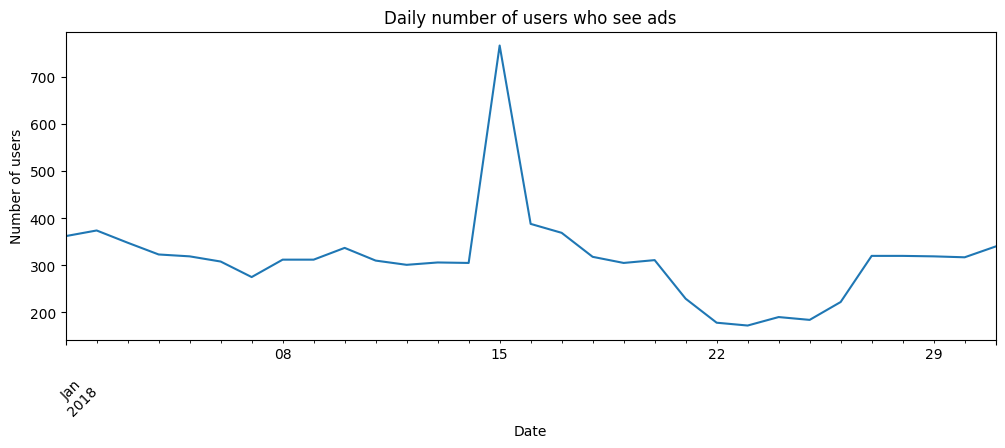

In [21]:
#visualizing the result


# Annotate

plt.figure(figsize=(12,4))
plt.title('Daily number of users who see ads')
daily_users.plot()
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()


## Total Number Of Marketing Channel used within the month

In [22]:
channel_count=df['marketing_channel'].value_counts(sort=True,ascending=False)
channel_count

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

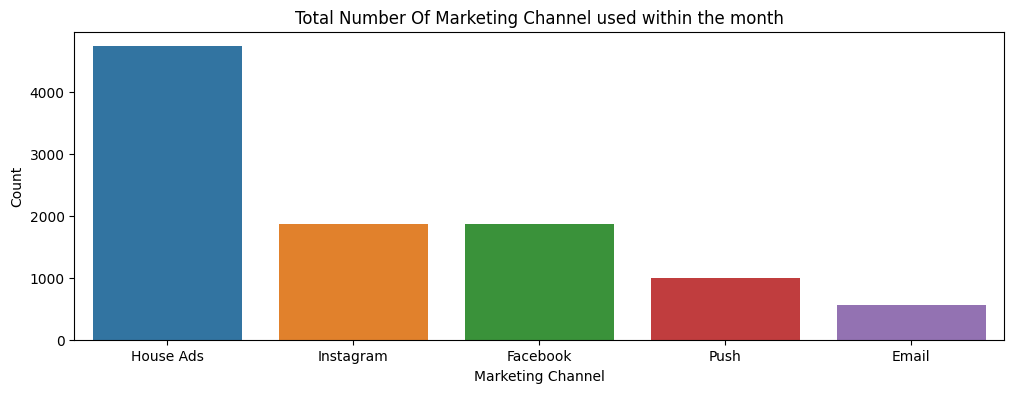

In [23]:
# lets Visualize it using bar graph
plt.figure(figsize=(12, 4))#The figsize attribute allows us to specify the width and height of a figure in-unit inches
sns.barplot(x=channel_count.index, y=channel_count.values)
plt.xlabel("Marketing Channel")
plt.ylabel("Count")
plt.title("Total Number Of Marketing Channel used within the month", fontsize=12)
plt.show()



In [24]:
daily_ads_count=df.pivot_table(values="user_id",index="date_served", columns="marketing_channel", aggfunc=len)
daily_ads_count.head(10)
#values - column to aggregate, optional
#columns- column, Grouper, array, or list of the previous
#aggfunc -function, list of functions, dict, default numpy.mean



marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1,69,191,78,36
2018-01-02,4,64,250,63,36
2018-01-03,2,63,220,66,37
2018-01-04,2,66,168,64,36
2018-01-05,1,64,160,70,36
2018-01-06,5,64,152,65,29
2018-01-07,3,52,132,60,34
2018-01-08,1,67,154,65,32
2018-01-09,2,59,157,60,37


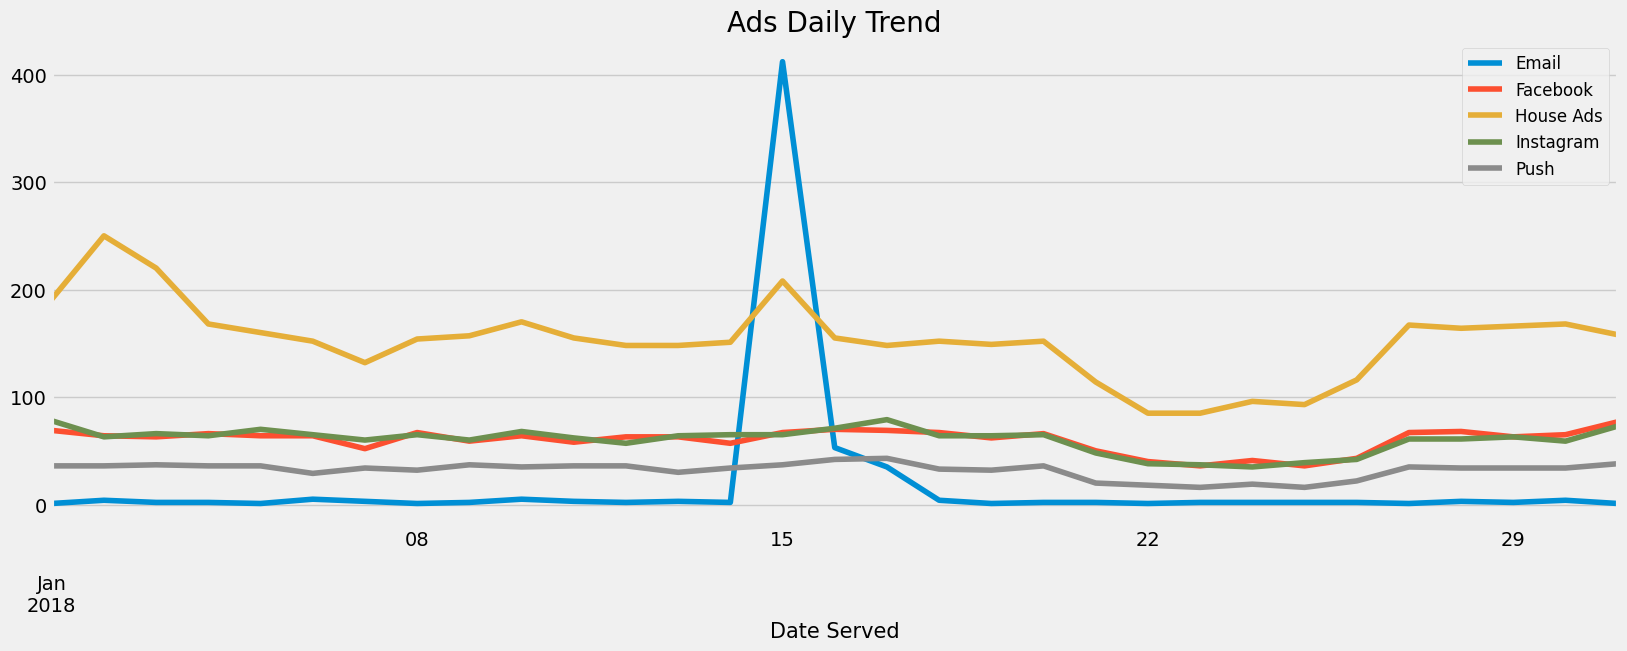

In [25]:
# lets vvisualize it using the line graph

plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15);
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12);


- Other than the email blast on the 15th of the month, there has been negligible activity
- The bulk of the chunk consists of house ads, but their numbers have been fluctuating.
- Throughout the month, there has been no significant change in the performance of Facebook, Instagram, and push ads.

**Solution to my Observation**

1.**Increase activity:** Since there has been negligible activity other than the email blast, increasing the frequency of marketing activities could help. This could involve running more house ads or experimenting with different types of ads on different platforms.

2.**Address fluctuation in house ads:** The fluctuation in house ads could be due to various factors such as changes in budget, targeting, or creative. It would be useful to analyze the data and identify the cause of these fluctuations. Once the root cause is determined, steps can be taken to address it.

3.**Experiment with different channels:** While Facebook, Instagram, and push ads are currently not showing significant changes, it may be worthwhile to experiment with other channels to see if they perform better. This could include channels **such as Google Ads, LinkedIn, or TikTok depending on the target audience and the nature of the product or service being marketed.**

4.**Refine targeting:** It may be helpful to revisit the target audience for the marketing efforts and refine the targeting to ensure that the ads are reaching the right people. This could involve analyzing data on customer demographics, interests, and behavior to create more targeted campaigns.

5.**Improve creative:** The creative used in the marketing efforts could be a factor in the lack of significant performance. Experimenting with different messaging, visuals, and formats could help improve the performance of the ads. It may also be useful to conduct user testing to get feedback on the creative and make improvements based on the feedback.

In [26]:
conversions= df.groupby('marketing_channel')['converted'].sum() # to check the total number of marketing_channel whose converted are true
ads = df.groupby('marketing_channel')['converted'].count()# to check the total number of marketing_channel whose converted are both true and false
conversion_df =pd.concat([conversions,ads],axis=1)
conversion_df

,converted,converted
marketing_channel,,
Email,193.0,565
Facebook,237.0,1860
House Ads,298.0,4733
Instagram,265.0,1871
Push,83.0,993


In [27]:
#changing the columns 
conversion_df.columns=['conversions','ads_served']
conversion_df

,conversions,ads_served
marketing_channel,,
Email,193.0,565
Facebook,237.0,1860
House Ads,298.0,4733
Instagram,265.0,1871
Push,83.0,993


In [28]:
conversion_df['conversion_rate'] = (conversion_df['conversions'] / conversion_df['ads_served']) * 100
conversion_df['conversion_rate'] = conversion_df['conversion_rate'].round(2).astype(str) + '%'

conversion_df

,conversions,ads_served,conversion_rate
marketing_channel,,,
Email,193.0,565,34.16%
Facebook,237.0,1860,12.74%
House Ads,298.0,4733,6.3%
Instagram,265.0,1871,14.16%
Push,83.0,993,8.36%


**The email channel has a high conversion rate, but the house ads channel, which has the highest allocation, has the lowest conversion rate. Therefore, it is necessary to review why such a large proportion of ads are being allocated to a channel that is not converting well.**

## Dividing into Control & Experiment Groups

In [29]:
conversions= df.groupby(['variant','marketing_channel'])['converted'].sum() # to check the total number of variant, marketing_channel whose converted are true
ads = df.groupby(['variant','marketing_channel'])['converted'].count()# to check the total number of variant, marketing_channel whose converted are both true and false
conversion_df =pd.concat([conversions,ads],axis=1)
conversion_df

converted  converted
variant         marketing_channel                      
control         Email                   80.0        274
                Facebook                52.0        894
                House Ads              172.0       2552
                Instagram               52.0        888
                Push                    15.0        468
personalization Email                  113.0        291
                Facebook               185.0        966
                House Ads              126.0       2181
                Instagram              213.0        983
                Push                    68.0        525

In [30]:
#changing the columns 
conversion_df.columns=['conversions','ads_served']
conversion_df['conversion_rate'] = round(conversion_df['conversions'] / conversion_df['ads_served'],2)
conversion_df

conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                     80.0         274             0.29
                Facebook                  52.0         894             0.06
                House Ads                172.0        2552             0.07
                Instagram                 52.0         888             0.06
                Push                      15.0         468             0.03
personalization Email                    113.0         291             0.39
                Facebook                 185.0         966             0.19
                House Ads                126.0        2181             0.06
                Instagram                213.0         983             0.22
                Push                      68.0         525             0.13

In [31]:
conversion_df['conversions'].groupby(level=0).sum()

variant
control            371.0
personalization    705.0
Name: conversions, dtype: float64

In [32]:
conversion_df['ads_served'].groupby(level=0).sum()

variant
control            5076
personalization    4946
Name: ads_served, dtype: int64

**Although both groups had a similar number of ads per channel, the personalization group achieved significantly higher conversions compared to the control group.The distribution of ads by channel below indicates that both groups had a roughly equal number of ads per channel.**

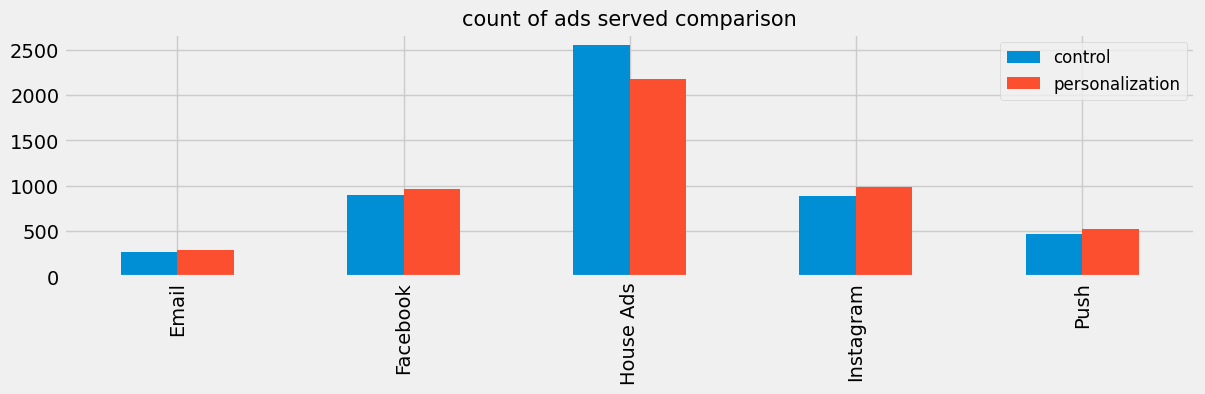

In [33]:
# lets visualize it using the line graph

plt.style.use('fivethirtyeight')
conversion_df.unstack(level=0).plot(kind='bar',y='ads_served',figsize=(13,3))#reshapes the dataframe by moving the index level 0 (assuming it is a multi-index dataframe) to become columns, which results in a wider dataframe.
plt.xlabel("");
plt.title("count of ads served comparison",size=15)
plt.legend(loc='upper right',fontsize=12);

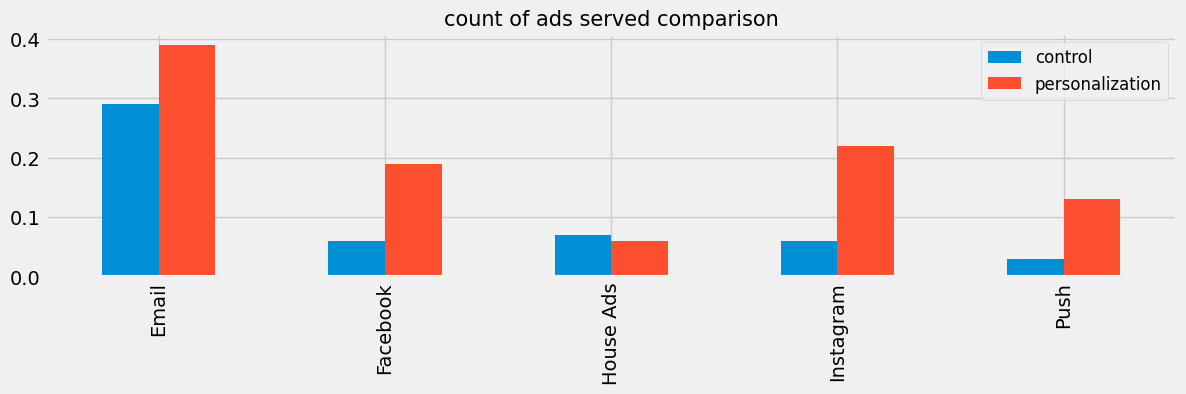

In [34]:
plt.style.use('fivethirtyeight')
conversion_df.unstack(level=0).plot(kind='bar',y='conversion_rate',figsize=(13,3))#reshapes the dataframe by moving the index level 0 (assuming it is a multi-index dataframe) to become columns, which results in a wider dataframe.
plt.xlabel("");
plt.title("count of ads served comparison",size=15)
plt.legend(loc='upper right',fontsize=12);

## Retention Rate

In [35]:
converted_df =df[df["converted"]==1.0]# filtering the dataframe df to allow only columns that meets converted==1.0 and giving it a new variable
converted_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,day_served,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,True
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,True
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,True
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,True
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,a100007288,2018-01-17,Email,control,1.0,German,German,30-36,2018-01-17,2018-04-26,Email,0.0,Wed,True
10031,a100007289,2018-01-17,Email,control,1.0,German,German,36-45,2018-01-17,2018-01-27,Email,0.0,Wed,True
10032,a100007290,2018-01-17,Email,control,1.0,German,German,45-55,2018-01-17,2018-01-24,Email,0.0,Wed,True
10033,a100007291,2018-01-17,Email,control,1.0,German,German,55+,2018-01-17,NaT,Email,1.0,Wed,True


In [36]:
total_subs = converted_df['user_id'].nunique()
total_subs

1015

In [37]:
retained_subs=converted_df.loc[converted_df['is_retained']==True]['user_id'].nunique()
print('Rentention Rate: {}%'.format(100*round(retained_subs/total_subs,1)))

Rentention Rate: 60.0%


# Conversions Analysis by Age Group

In [38]:
age_df=df.pivot_table(values='user_id',index=['marketing_channel','converted'],columns='age_group',aggfunc=len)
age_df

age_group                    0-18  19-24  24-30  30-36  36-45  45-55  55+
marketing_channel converted                                              
Email             0.0          54     59     68     47     51     50   43
                  1.0          39     52     52     13     12     15   10
Facebook          0.0         215    269    247    228    213    290  161
                  1.0          49     78     49     21     13      9   18
House Ads         0.0         636    703    623    668    558    647  600
                  1.0          58     58     58     31     31     31   31
Instagram         0.0         261    214    230    246    261    207  187
                  1.0          39    101     56     13     19     20   17
Push              0.0         170    120    160     82    190     77  111
                  1.0          16     25     23      4      3      5    7

# Conversion Function

In [39]:
def conversion_rate(df, column_names):
    # Total number of converted users
    column_conv = df[df['converted'] == 1].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = df.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = round(column_conv/column_total,2)
    
    # Fill missing values with 0
    conversion_rates = conversion_rate.fillna(0)
    return conversion_rates

In [40]:
age_group_conrate = conversion_rate(df,["marketing_channel","age_group"])
age_group_conrate

marketing_channel  age_group
Email              0-18         0.41
                   19-24        0.46
                   24-30        0.45
                   30-36        0.22
                   36-45        0.19
                   45-55        0.22
                   55+          0.19
Facebook           0-18         0.17
                   19-24        0.23
                   24-30        0.17
                   30-36        0.07
                   36-45        0.06
                   45-55        0.03
                   55+          0.09
House Ads          0-18         0.10
                   19-24        0.09
                   24-30        0.10
                   30-36        0.05
                   36-45        0.06
                   45-55        0.05
                   55+          0.06
Instagram          0-18         0.13
                   19-24        0.31
                   24-30        0.19
                   30-36        0.05
                   36-45        0.06
         

In [41]:
age_group_conv_df=pd.DataFrame(age_group_conrate.unstack(level=0)) # this will unstack the variable from row to column,level=0 rep "marketing channel",level=1 rep "age group"
age_group_conv_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18,0.41,0.17,0.10,0.13,0.08
19-24,0.46,0.23,0.09,0.31,0.17
24-30,0.45,0.17,0.10,0.19,0.11
30-36,0.22,0.07,0.05,0.05,0.05
36-45,0.19,0.06,0.06,0.06,0.02
45-55,0.22,0.03,0.05,0.07,0.06
55+,0.19,0.09,0.06,0.07,0.05


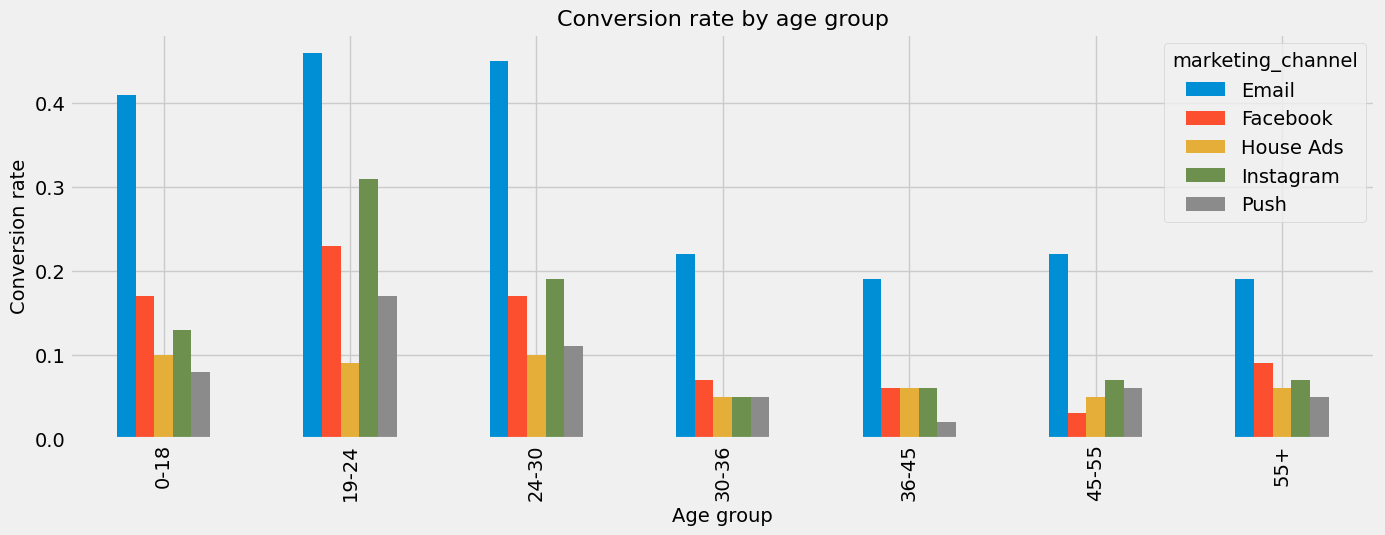

In [42]:
plt.style.use('fivethirtyeight')
age_group_conv_df.plot(kind='bar',figsize=(15,5))
plt.title('Conversion rate by age group', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14);

- Compared to the 30-36 and older age groups, the younger age groups up to 24-30 exhibit higher conversion rates across all channels. However, even among the younger age groups, house ads have low conversion rates.

# Conversions Analysis by Date_Served

In [43]:
date_served_convr_df=pd.DataFrame(conversion_rate(df,['marketing_channel','date_served']).unstack(level=0))
date_served_convr_df.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.12,0.08,0.11,0.08
2018-01-02,1.0,0.10,0.08,0.13,0.06
2018-01-03,0.0,0.08,0.09,0.17,0.08
2018-01-04,0.5,0.14,0.09,0.13,0.06
2018-01-05,1.0,0.11,0.13,0.16,0.03
2018-01-06,0.6,0.11,0.11,0.10,0.07
2018-01-07,1.0,0.10,0.15,0.18,0.09
2018-01-08,1.0,0.14,0.10,0.12,0.06
2018-01-09,0.5,0.12,0.13,0.15,0.05


# Plotting Function

In [44]:
def plotting_conv(df,kind):
    for column in df.columns:
        plt.style.use('ggplot')
        df[column].plot(kind=kind,figsize=(20,5))
        
        plt.title(column + ' conversion rate', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.grid(False)
        plt.show()
        plt.clf();#clear the current figure and create a new plot with fresh data.


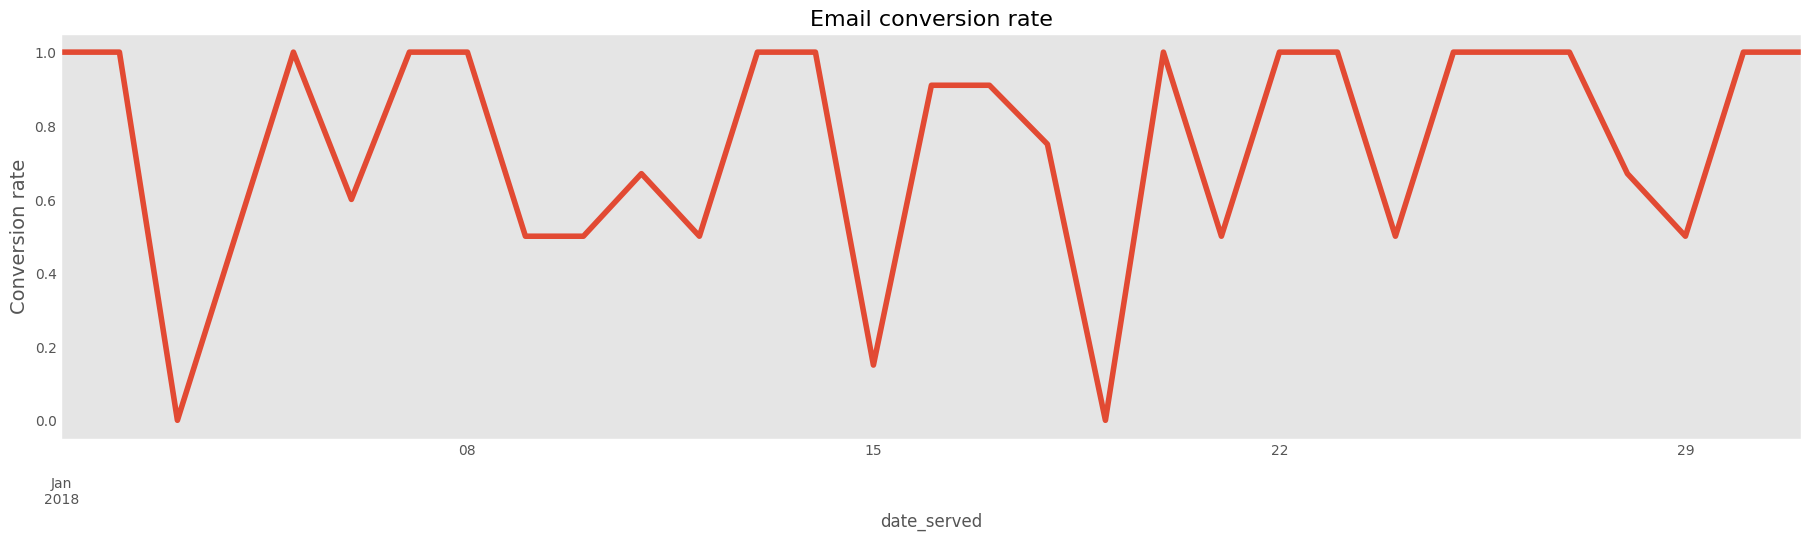

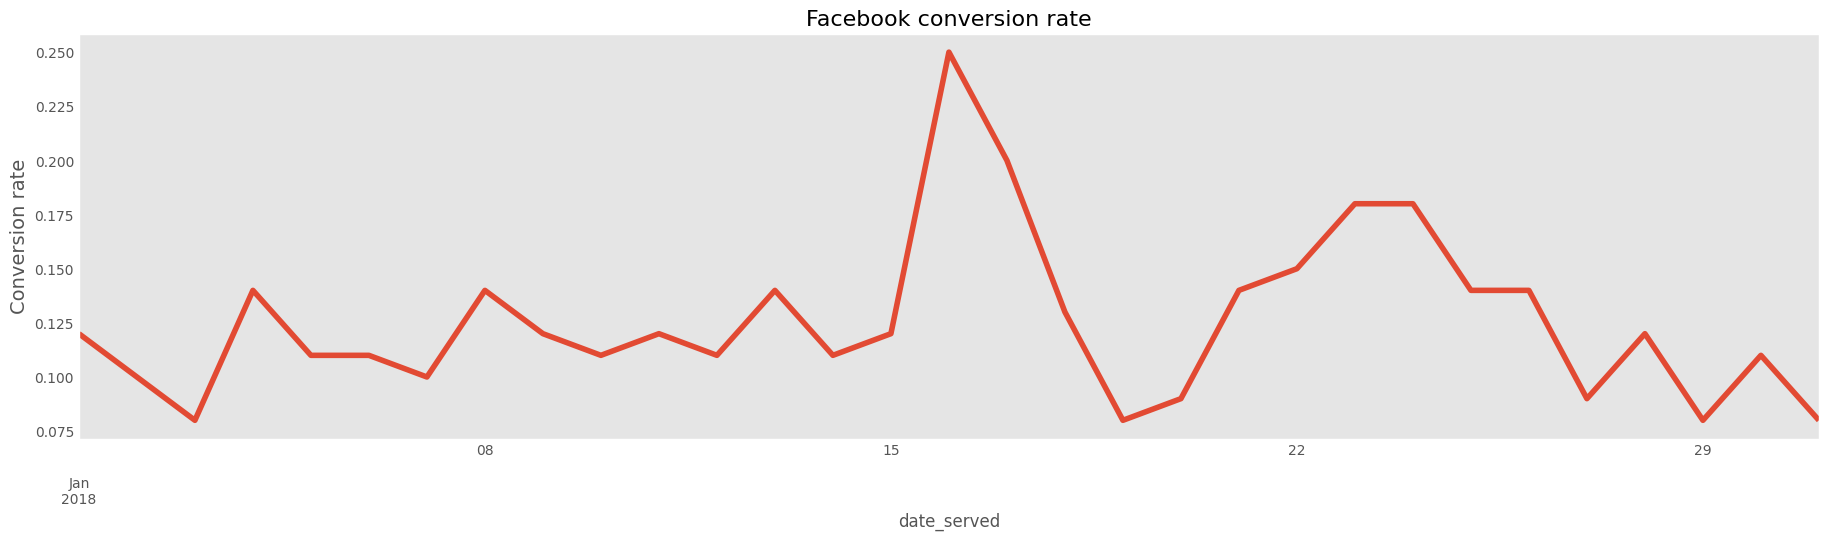

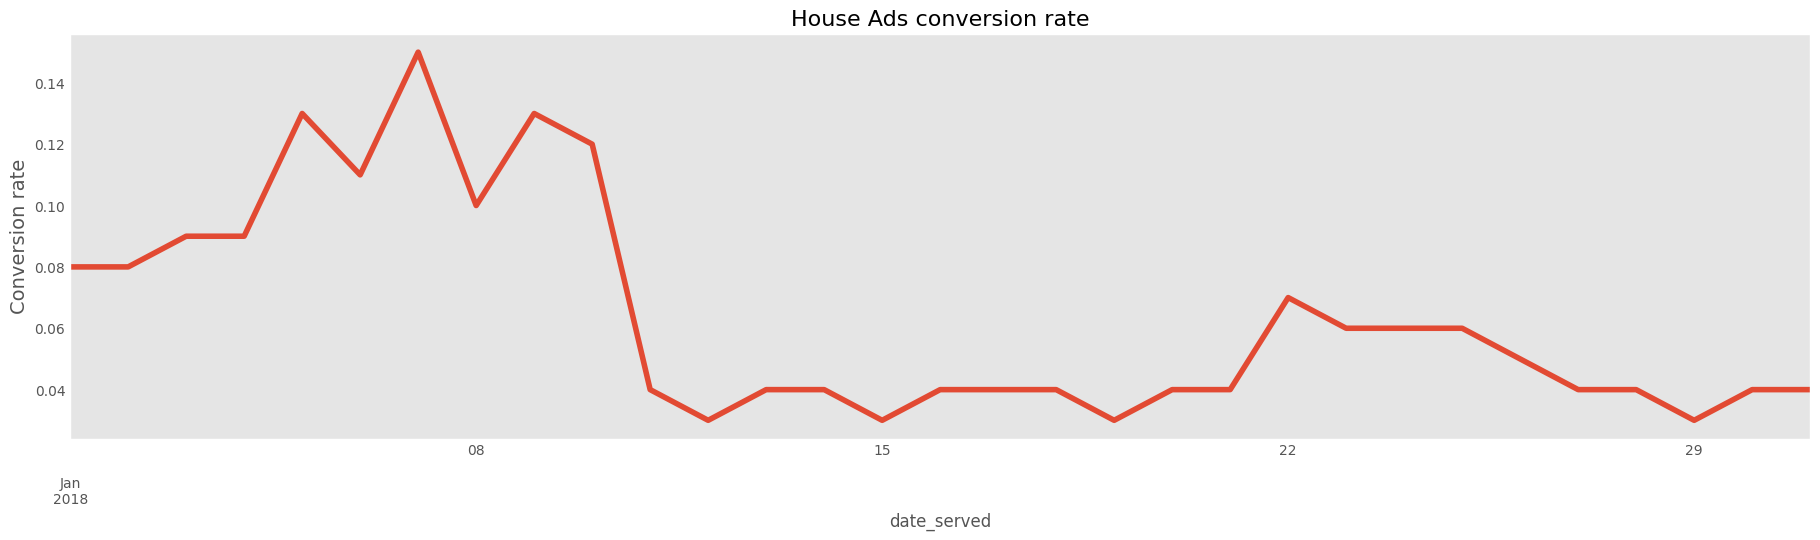

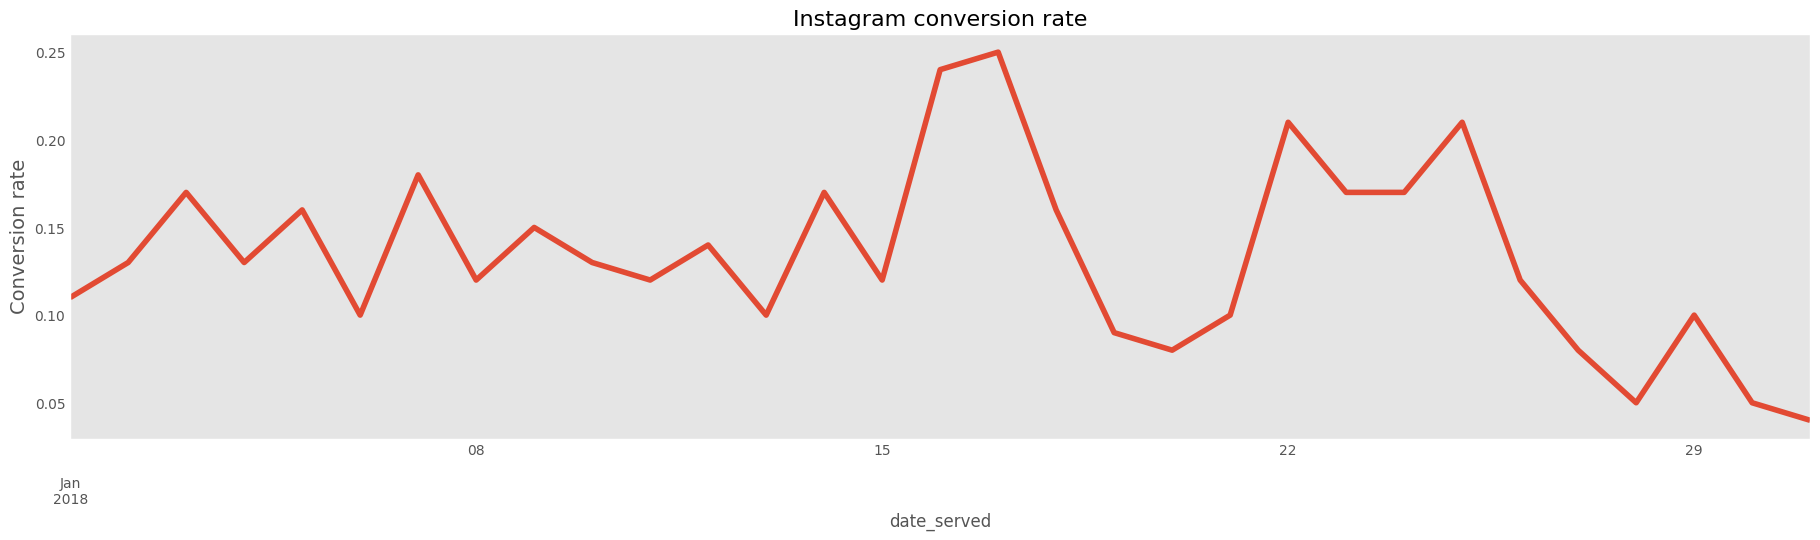

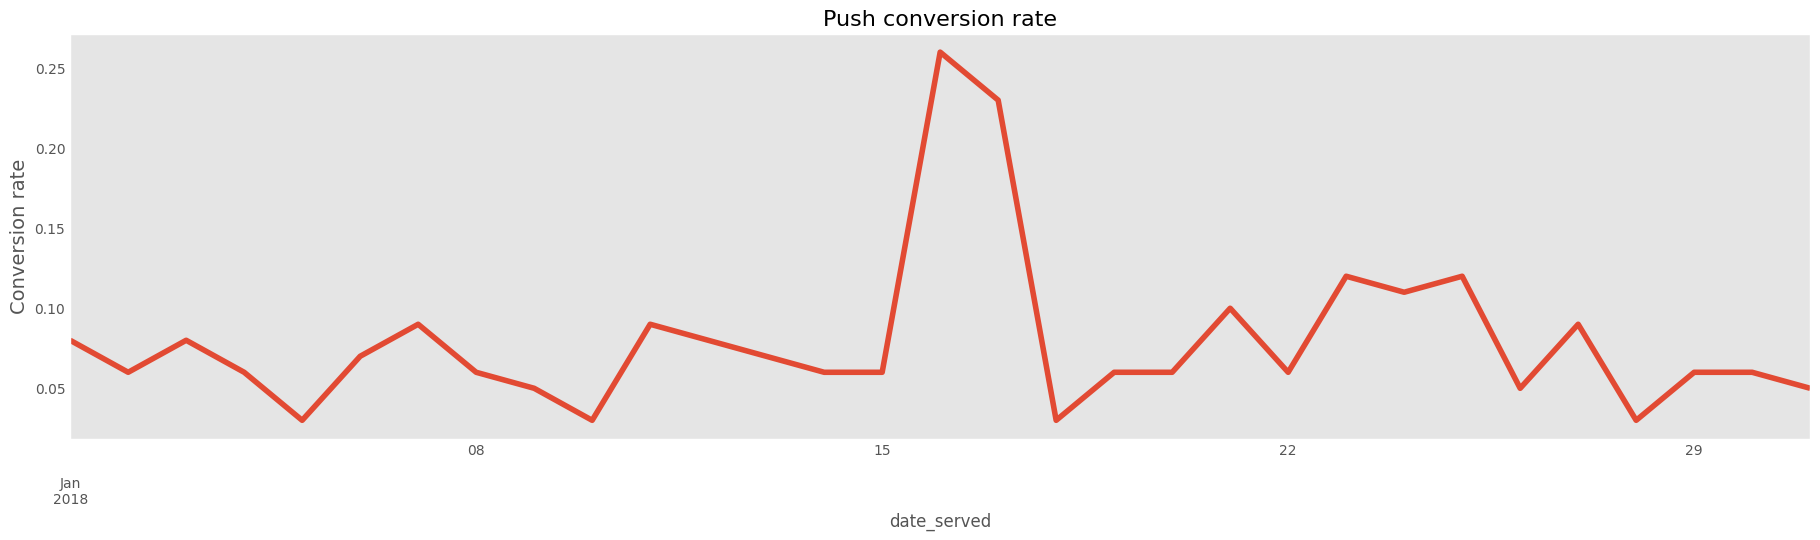

<Figure size 640x480 with 0 Axes>

In [45]:
plotting_conv(date_served_convr_df,"line");

- The conversion rates for all channels, except for house ads, exhibit significant daily fluctuations. 
- There has been a significant decrease in the conversion rates for house ads after the 10th, which requires further investigation.

# Plotting Conversion rates by Age

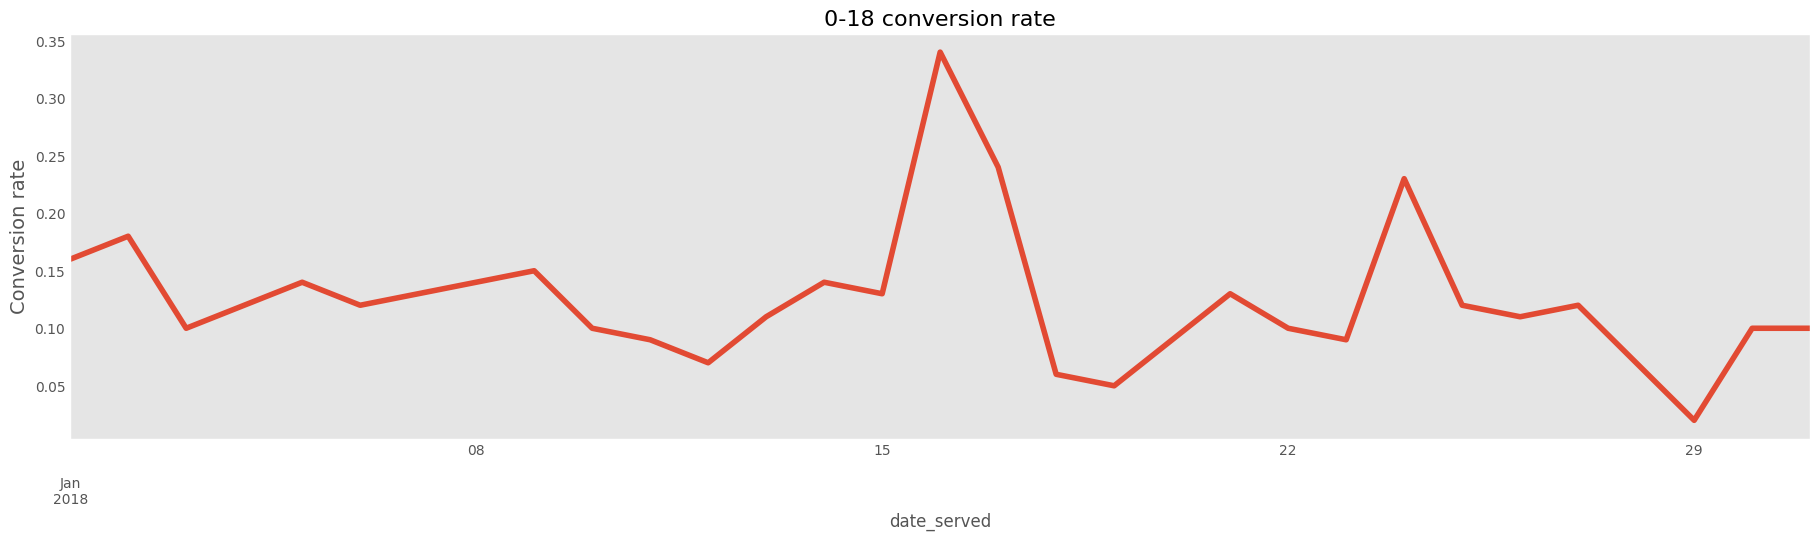

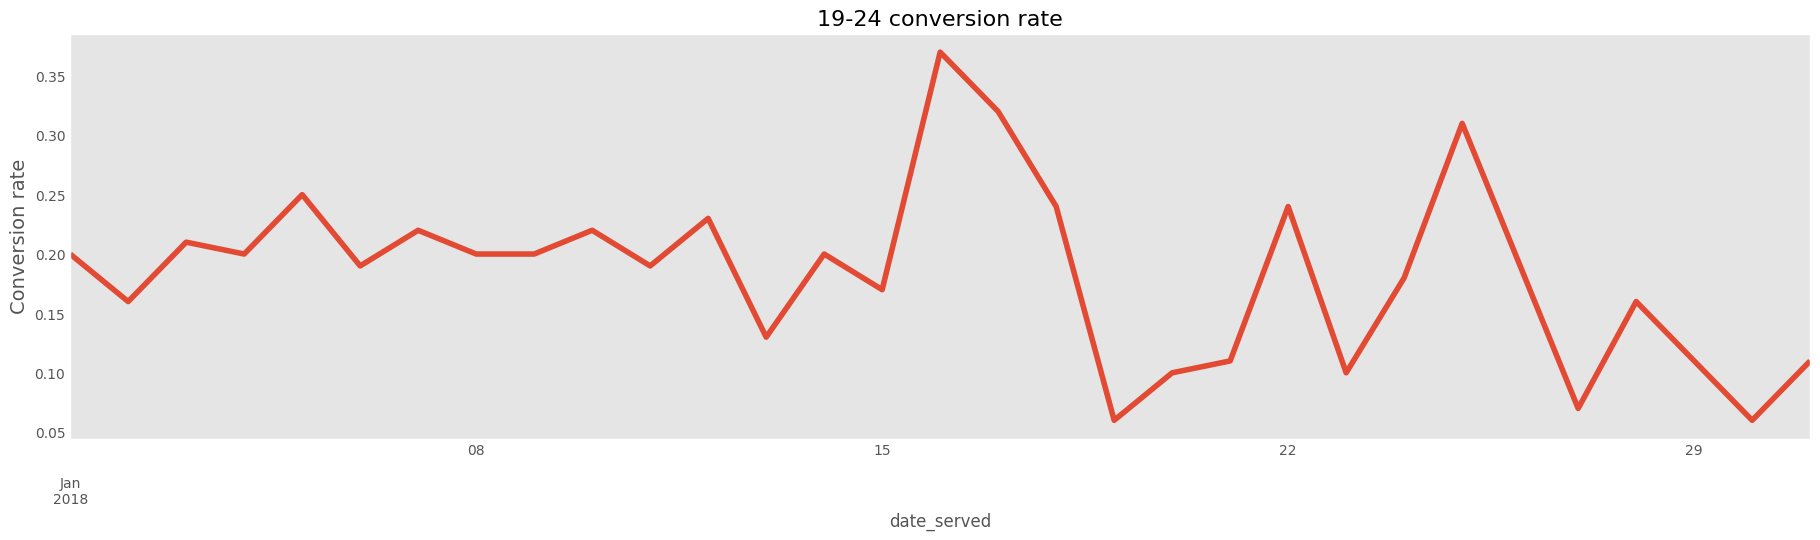

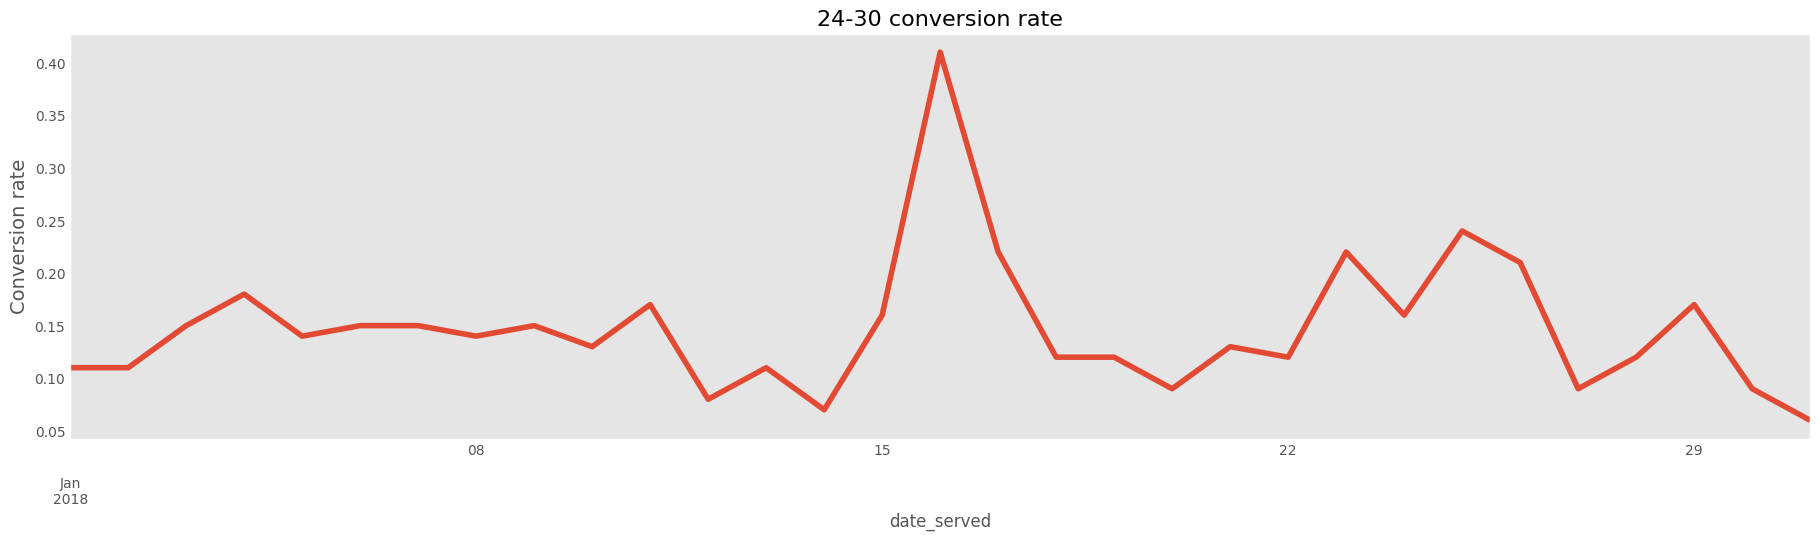

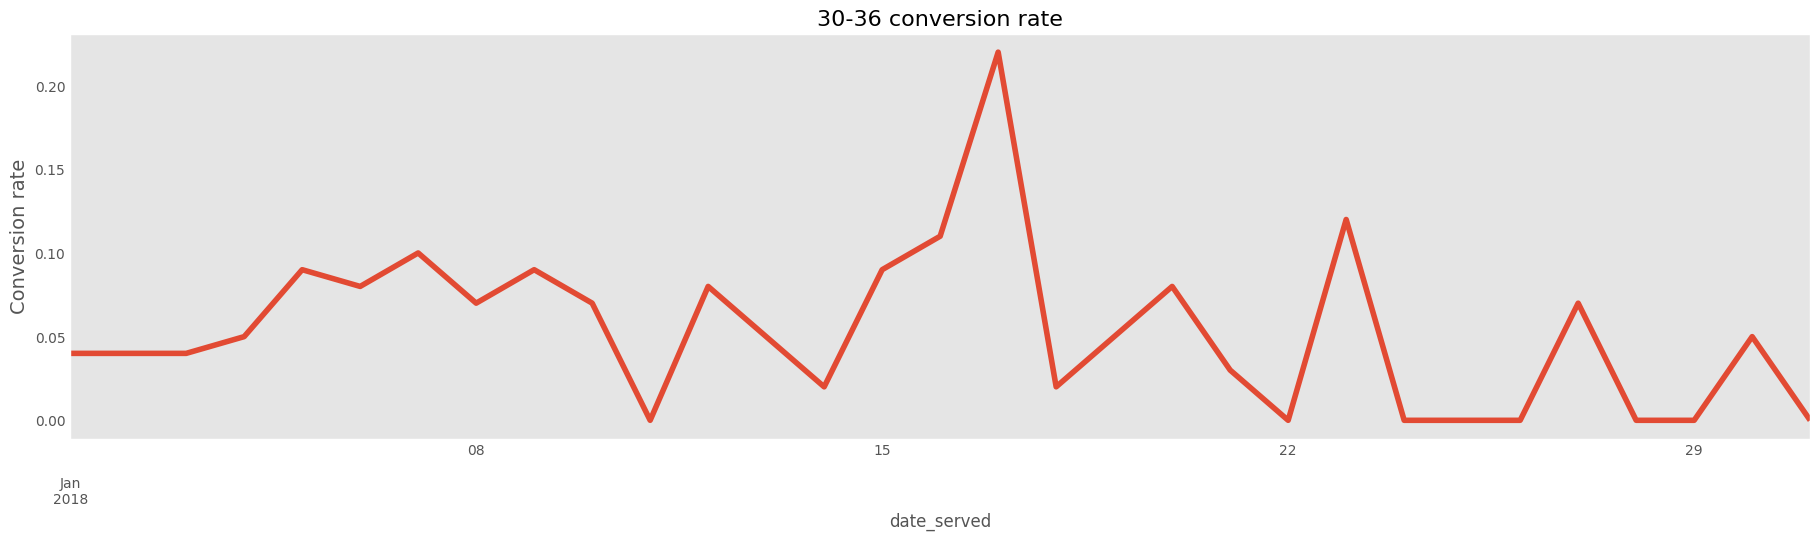

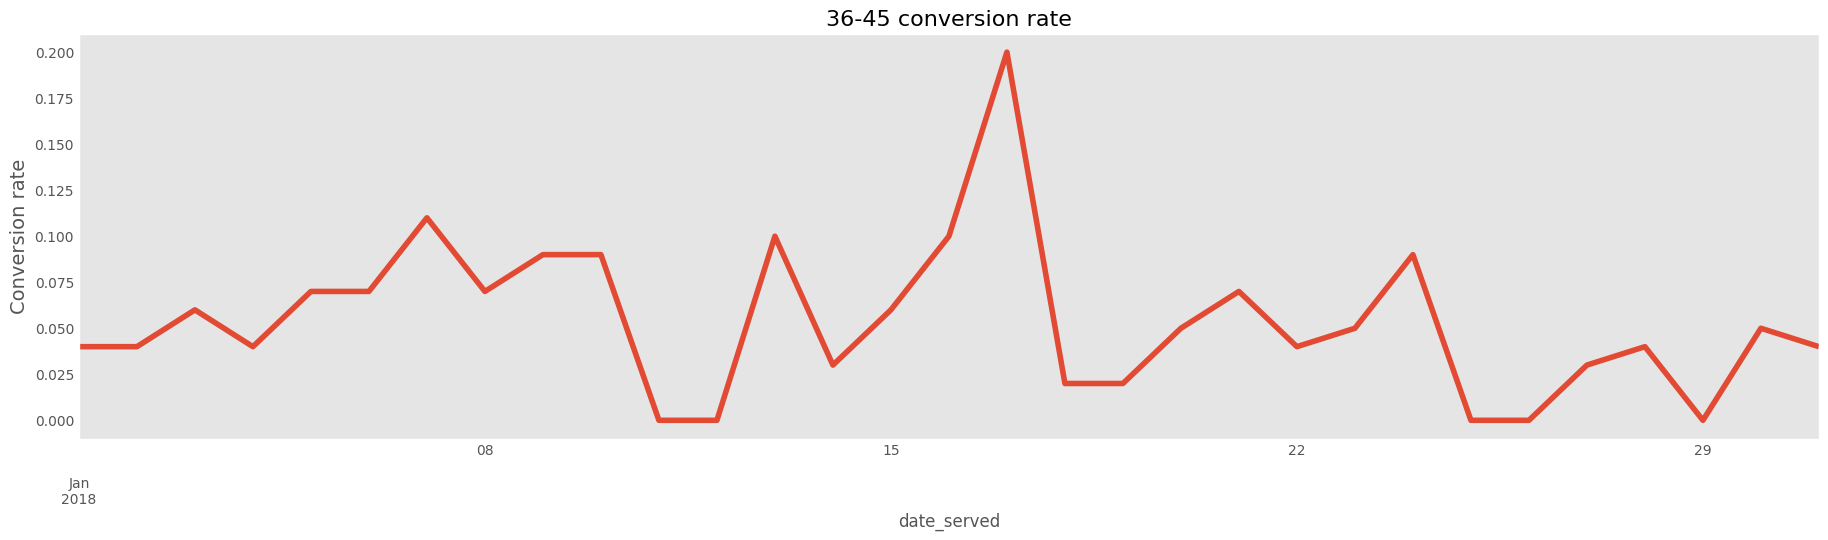

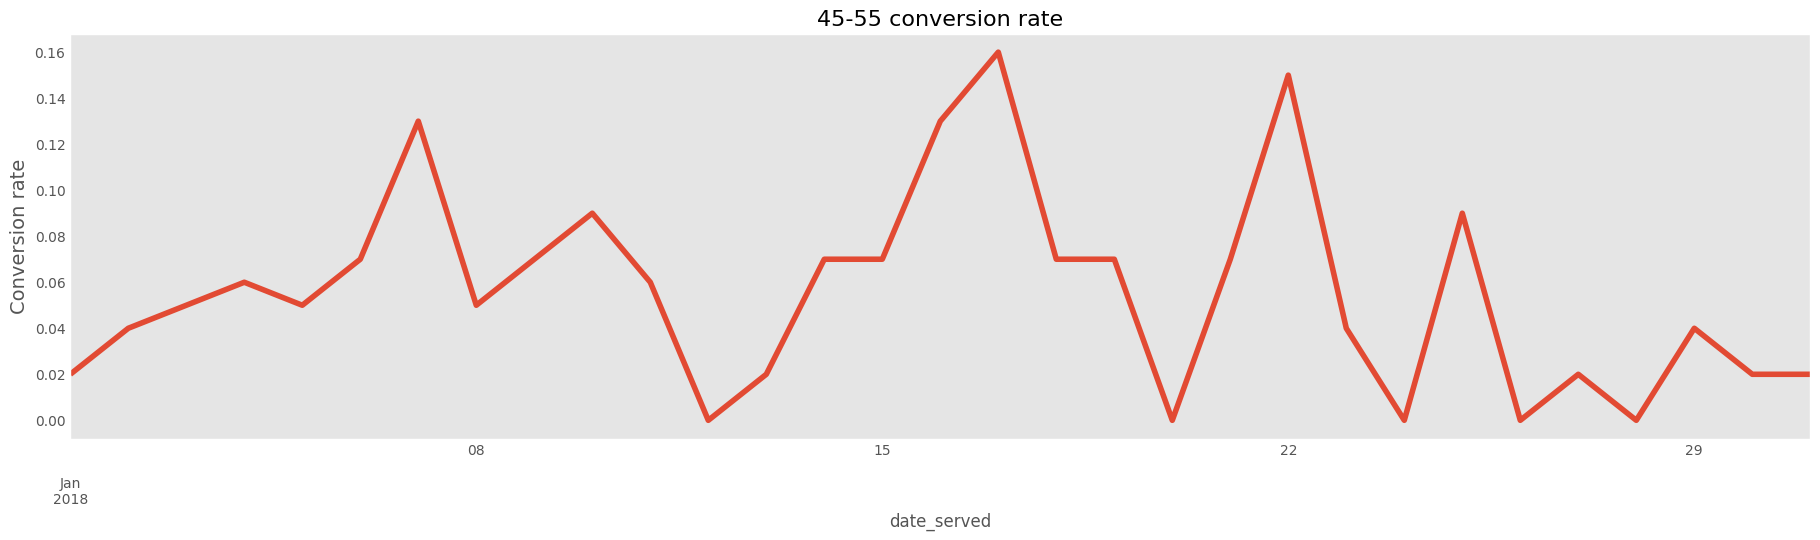

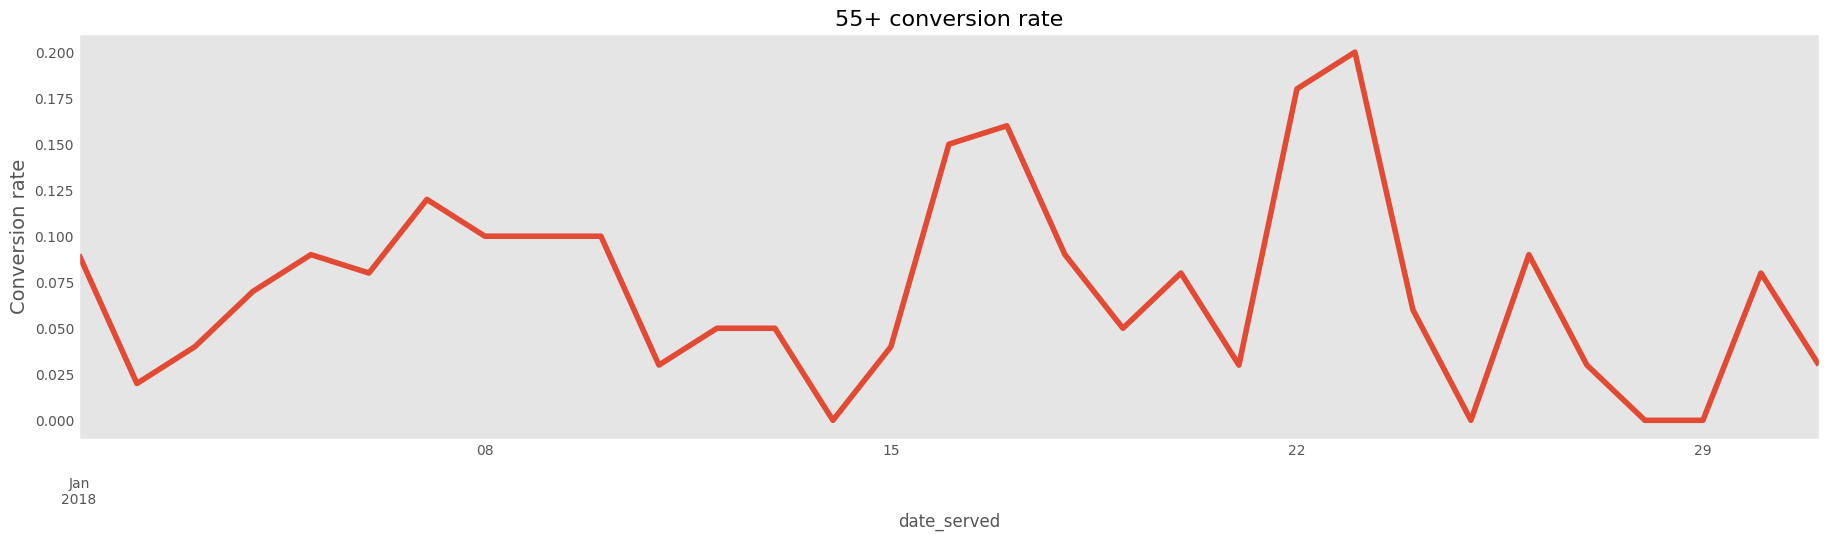

<Figure size 640x480 with 0 Axes>

In [46]:
age_group_conv_df=pd.DataFrame(conversion_rate(df,['age_group','date_served']).unstack(level=0))
plotting_conv(age_group_conv_df,"line")

- There is a spike in conversion rates for each age group around the 16th of the month. 
- This increase in conversion rates is primarily driven by Facebook, Instagram, and Push Ads, as these channels experienced a surge in conversion rates during the same period.

# Day of week


In [47]:
# ordering the day of the week
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df['day_served'] = pd.Categorical(df['day_served'], categories=day_order, ordered=True)
DOW_conversion_df = pd.DataFrame(conversion_rate(df,['day_served','marketing_channel']).unstack(level=1))
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
day_served,,,,,
Mon,0.16,0.12,0.06,0.12,0.06
Tue,0.91,0.15,0.07,0.15,0.12
Wed,0.84,0.13,0.08,0.15,0.11
Thu,0.73,0.13,0.06,0.14,0.07
Fri,0.67,0.11,0.06,0.13,0.06
Sat,0.82,0.11,0.06,0.09,0.07
Sun,0.75,0.12,0.07,0.13,0.07


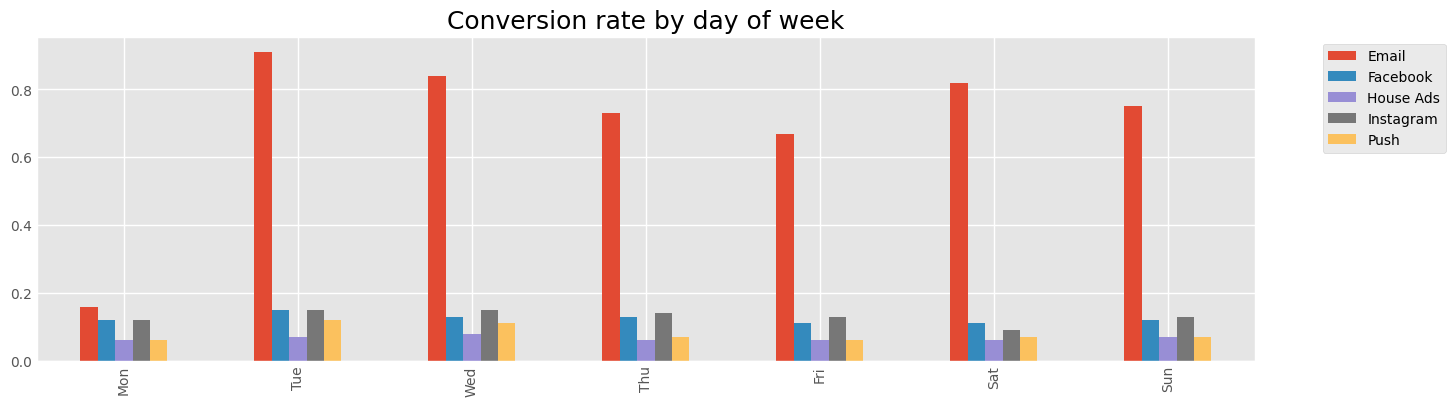

In [48]:
DOW_conversion_df.plot(kind="bar",figsize=(14,4))
plt.title('Conversion rate by day of week',fontsize=18)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

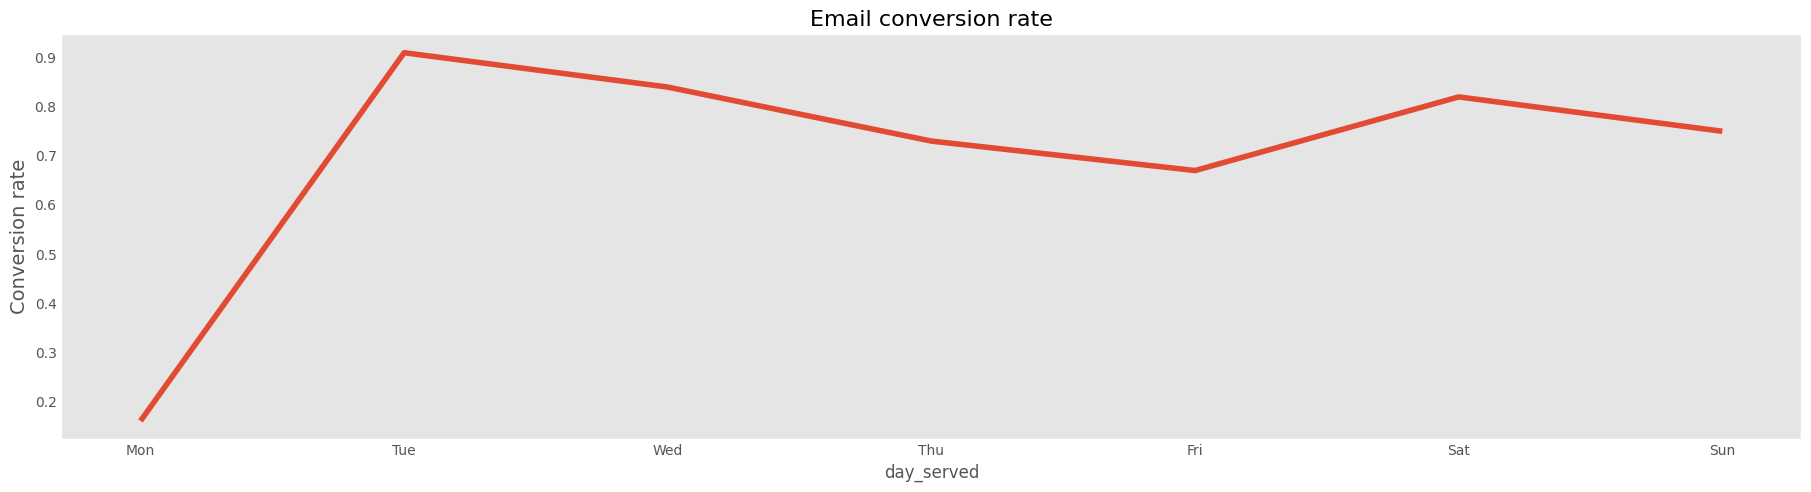

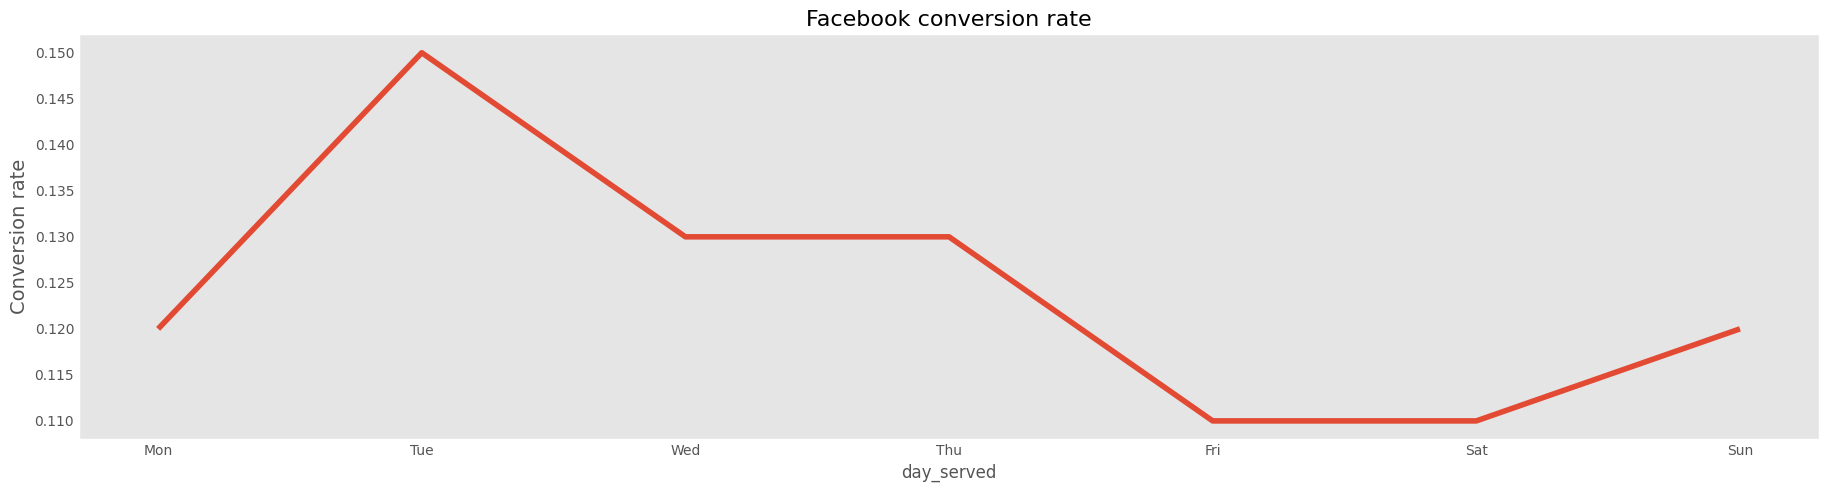

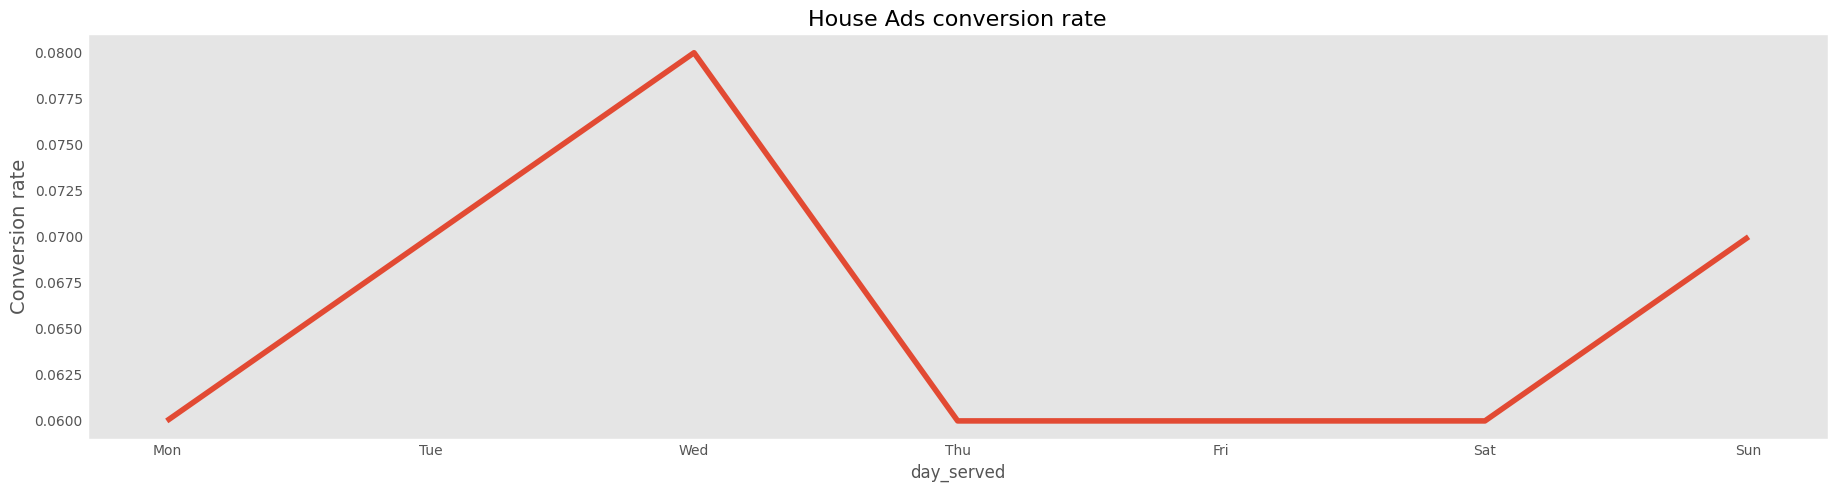

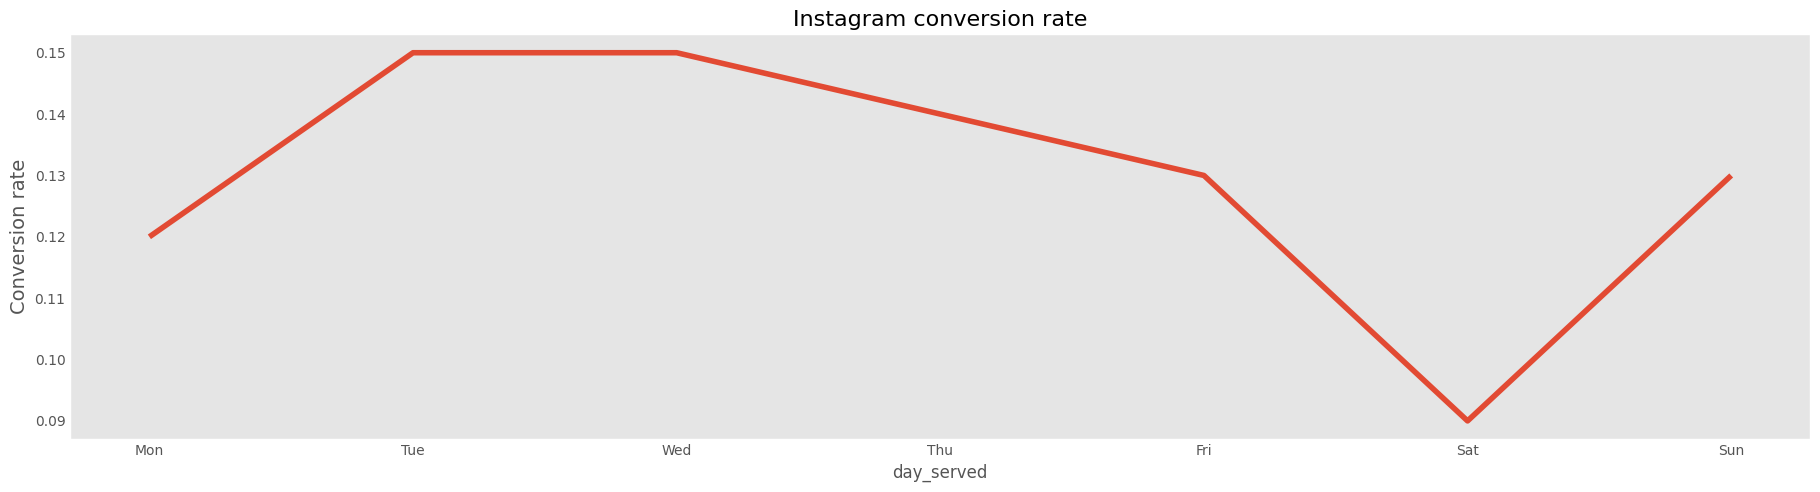

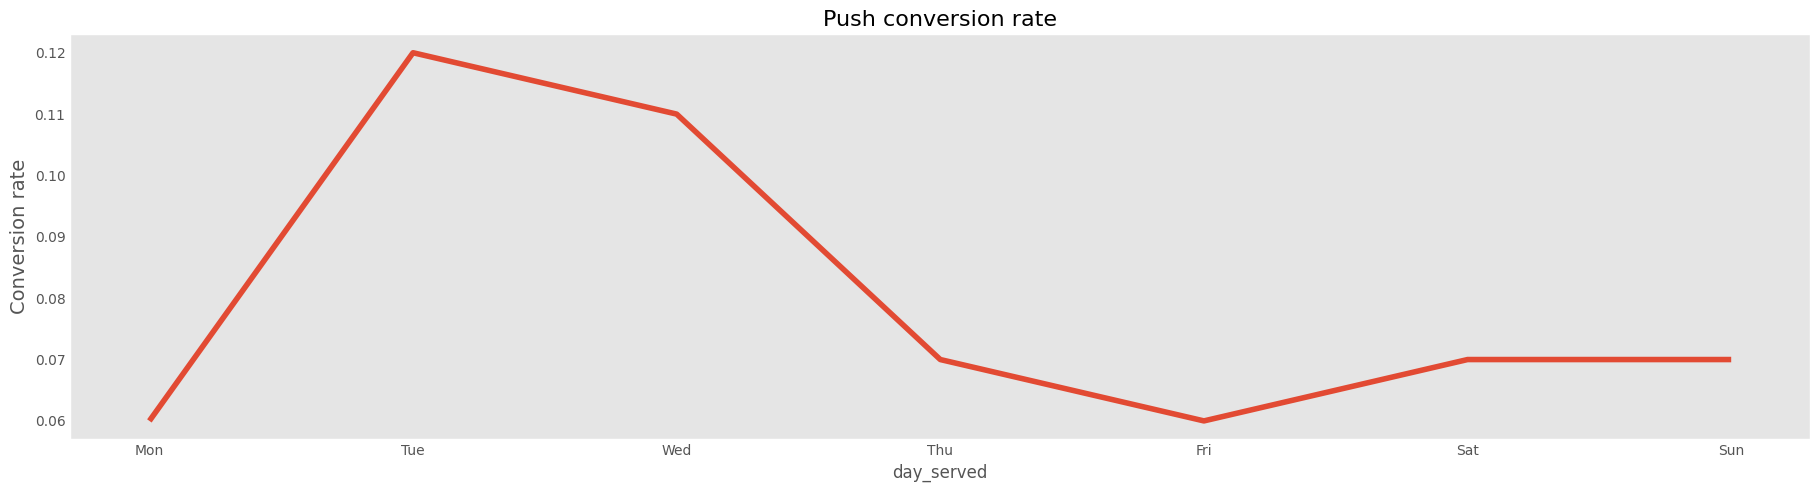

<Figure size 640x480 with 0 Axes>

In [49]:
plotting_conv(DOW_conversion_df,"line");

### House ads conversion rate

As a data scientist, one of your responsibilities is to investigate any concerns that stakeholders may have regarding changing metrics. Currently, the house ads team has expressed concern about irregularities in their conversion rate. Your task is to determine whether these changes are simply natural fluctuations or if they require further investigation. Specifically, you will be analyzing the conversion rate of the house ads.

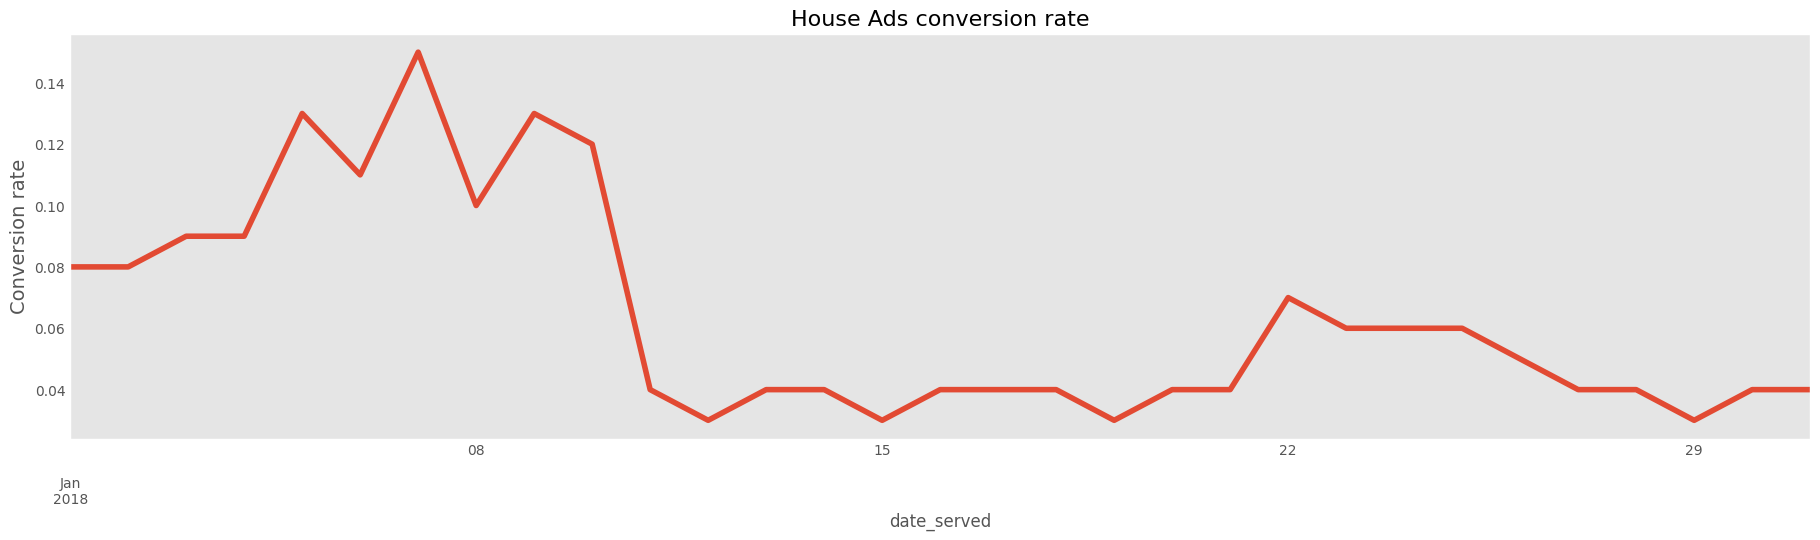

<Figure size 640x480 with 0 Axes>

In [50]:
plotting_conv(pd.DataFrame(date_served_convr_df['House Ads']),"line")

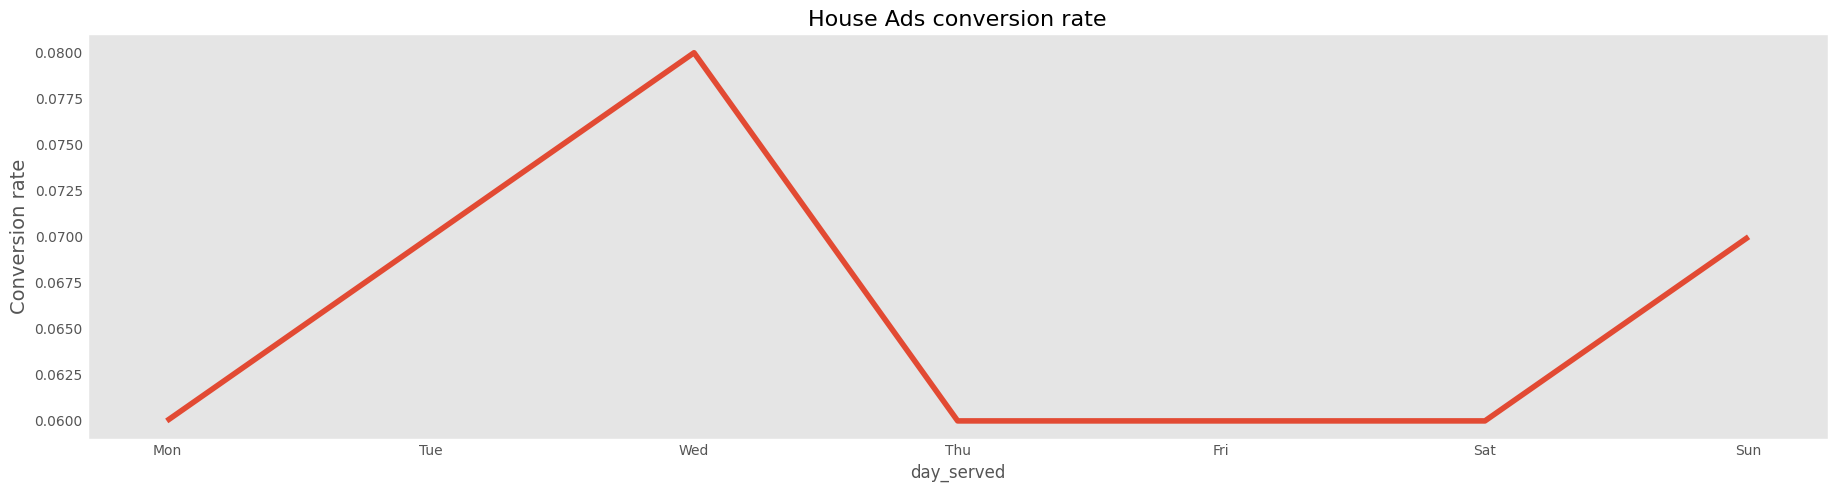

<Figure size 640x480 with 0 Axes>

In [51]:
plotting_conv(pd.DataFrame(DOW_conversion_df['House Ads']),"line")

**Analysing House ads conversion rate**

 The fact that the conversion rate for house ads has decreased since January 11. As a data scientist, I will have to investigate the potential causes for this decline. My goal is to determine whether the decrease is due to shifts in user behavior, such as differences across the day of the week or time of the month, or if there are issues with the technical implementation or marketing strategy.

It is vital to accurately identify the root cause of these fluctuations in order to effectively address the problem. Through my analysis, I will work to determine the underlying factors behind the decrease in conversion rate and recommend potential solutions.

In [52]:

conversion_df

conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                     80.0         274             0.29
                Facebook                  52.0         894             0.06
                House Ads                172.0        2552             0.07
                Instagram                 52.0         888             0.06
                Push                      15.0         468             0.03
personalization Email                    113.0         291             0.39
                Facebook                 185.0         966             0.19
                House Ads                126.0        2181             0.06
                Instagram                213.0         983             0.22
                Push                      68.0         525             0.13

In [53]:
idx = pd.IndexSlice #to create a slice object that can be used to select specific rows and columns from a multi-index DataFrame.
conversion_df.loc[idx[:,'House Ads'],:]#slice to pick only house ads,(the : before the ,means include all rows while the : after the ,means includ all columns associated with it

,,conversions,ads_served,conversion_rate
variant,marketing_channel,,,
control,House Ads,172.0,2552,0.07
personalization,House Ads,126.0,2181,0.06


The control group and the experimental group both exhibit similarly low conversion rates.

### Weekday vs Weekend House Ads Conversion

In [54]:
house_ads_df = pd.DataFrame(date_served_convr_df["House Ads"])
house_ads_df.reset_index(inplace=True)# reset the index to a new sequence of integers or to a column of the dataframe which is 'DOW'.
house_ads_df['DOW']=house_ads_df['date_served'].dt.dayofweek
house_ads_df.head()

,date_served,House Ads,DOW
0,2018-01-01,0.08,0
1,2018-01-02,0.08,1
2,2018-01-03,0.09,2
3,2018-01-04,0.09,3
4,2018-01-05,0.13,4


In [55]:
house_ads_df['day type'] = house_ads_df['DOW'].apply(lambda x: "Weekday" if x<=4 else "Weekend")#lambda x takes all the value under house_ads_df['DOW'] and apply conditional statement
house_ads_df.head()

,date_served,House Ads,DOW,day type
0,2018-01-01,0.08,0,Weekday
1,2018-01-02,0.08,1,Weekday
2,2018-01-03,0.09,2,Weekday
3,2018-01-04,0.09,3,Weekday
4,2018-01-05,0.13,4,Weekday


In [56]:
print("Conversion rates for House Ads")
print(house_ads_df.groupby("day type")["House Ads"].mean())

Conversion rates for House Ads
day type
Weekday    0.064348
Weekend    0.062500
Name: House Ads, dtype: float64


There is no significant difference in conversion rates of house ads between weekdays and weekends.





**House ads conversion by language**

Let's first confirm if the language displayed aligns with the target user's preferences, now that it's evident there are no natural fluctuations throughout the week. It's possible that the new marketing campaign may not have a universal appeal and may be more effective within specific cultural contexts.

In [57]:
house_ads_df=df[df['marketing_channel']=='House Ads']
print("Total house ads: {}".format(len(house_ads_df)))
print("House ads with wrong language: {}".format(sum(house_ads_df['language_displayed'] != house_ads_df['language_preferred'])))
print("House ads with correct language: {}".format(sum(house_ads_df['language_displayed'] == house_ads_df['language_preferred'])))
print("House ads conversions: {}".format(house_ads_df['converted'].sum()))

Total house ads: 4733
House ads with wrong language: 453
House ads with correct language: 4280
House ads conversions: 298.0


In [58]:
house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)
house_ads_df.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15344\1971611253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,day_served,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,Yes
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,Yes
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,Yes
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,Yes
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,Yes


In [59]:
house_ads_lang_df=house_ads_df.groupby(['date_served','is_language_correct'])['user_id'].count().unstack(level=1)
house_ads_lang_df.fillna(0,inplace=True)
house_ads_lang_df['Correct %'] = 100*house_ads_lang_df['Yes']/(house_ads_lang_df['No'] + house_ads_lang_df['Yes'])
house_ads_lang_df.round()

is_language_correct,No,Yes,Correct %
date_served,,,
2018-01-01,2.0,189.0,99.0
2018-01-02,3.0,247.0,99.0
2018-01-03,0.0,220.0,100.0
2018-01-04,0.0,168.0,100.0
2018-01-05,0.0,160.0,100.0
2018-01-06,1.0,151.0,99.0
2018-01-07,2.0,130.0,98.0
2018-01-08,0.0,154.0,100.0
2018-01-09,0.0,157.0,100.0



Setting up conversion indexes

The issue with House Ads conversion appears to be related to language, and it is essential to determine the number of subscribers lost due to this bug. To accomplish this, you will compare the conversion rates of non-English languages to English conversion rates before the language bug arose. This comparison will be done for the period from the 1st to the 10th of the month since the bug occurred on the 11th.

In [60]:
house_ads_no_bug = house_ads_df[house_ads_df['date_served']<"2018-01-11"]
conv_rates = conversion_rate(house_ads_no_bug,['language_preferred'])
conv_rates_df = pd.DataFrame(conv_rates)
conv_rates_df.reset_index(inplace=True)
conv_rates_df.columns=['Language','Conversion_rate']
conv_rates_df
house_ads_no_bug.groupby('language_preferred')['converted'].sum()

language_preferred
Arabic       7.0
English    142.0
German      12.0
Spanish     17.0
Name: converted, dtype: float64

In [61]:
house_ads_no_bug.groupby('language_preferred')['converted'].count()


language_preferred
Arabic       14
English    1592
German       31
Spanish     117
Name: converted, dtype: int64

In [62]:
#finding if language was correct what would have been conv rate
house_ads_lang_counts=pd.DataFrame(house_ads_df.groupby('language_preferred')['user_id'].count())
house_ads_lang_counts.reset_index(inplace=True)
house_ads_lang_counts.columns=['Language','Ad_Count']
house_ads_lang_counts

,Language,Ad_Count
0,Arabic,107
1,English,4112
2,German,112
3,Spanish,402


In [63]:
house_ads_lang_counts['Expected_Conversion_Count']=house_ads_lang_counts['Ad_Count']*conv_rates_df['Conversion_rate']
house_ads_lang_counts

,Language,Ad_Count,Expected_Conversion_Count
0,Arabic,107,53.50
1,English,4112,411.20
2,German,112,49.28
3,Spanish,402,64.32


In [64]:
print("Without bug house ads would have converted: {}".format(house_ads_lang_counts['Expected_Conversion_Count'].sum().round()))


Without bug house ads would have converted: 578.0


In [65]:
len(house_ads_no_bug.loc[(house_ads_no_bug['language_preferred']=='English') & house_ads_no_bug['converted']==1])


142

# A/B Testing

Test allocation

Before analyzing the results of the email campaign, it's important to ensure that users were equally allocated to the test and control groups. The email campaign was conducted as an A/B test, with half of the emails containing generic upsells to the product and the other half featuring personalized messaging tailored to the user's site usage.


In [66]:
email_df = df[df['marketing_channel']== "Email"]

In [67]:
email_df['variant'].value_counts()

personalization    291
control            274
Name: variant, dtype: int64

**Comparing conversion rates**

After confirming that allocation is relatively even, the focus should shift to analyzing the conversion rate for the control and personalization groups. Since conversion rate is the key metric for this test, it's crucial to determine if there was a higher conversion rate in the personalization treatment compared to the control. Although further analysis will be done in subsequent exercises, the difference between the key metric in the control and treatment groups is the most significant aspect of evaluating the success of an A/B test. In the current workspace, the DataFrame 'email' has been loaded, which only includes rows from the marketing DataFrame where the marketing_channel is 'Email'.

In [68]:
subscribers = email_df.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

subscribers_df

variant,control,personalization
user_id,,
a100000526,NaN,1.0
a100000530,NaN,1.0
a100000534,NaN,0.0
a100000538,NaN,1.0
a100000542,NaN,1.0
...,...,...
a100007288,1.0,NaN
a100007289,1.0,NaN
a100007290,1.0,NaN


In [69]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


**Creating a lift function**

To calculate lift, you can find the difference between the treatment effect (or mean) and the control effect (or mean), divided by the control effect (or mean). This formula gives you the percentage difference between the two groups.

In this exercise, you will create a function that automates the process of calculating lift, which can be useful for marketing teams that run tests frequently. By automating certain parts of the testing process, you can save time for more in-depth analysis.

To calculate lift, first use np.mean() to find the mean of the control and treatment groups (which can be labeled as 'a' and 'b'). Then, use these means to calculate the lift of the treatment group.

After defining the lift() function, you can print the results of the function using the control and personalization variables.





In [70]:
lift = (np.mean(personalization) - np.mean(control))/np.mean(control)
print("Lift is {}%".format(round(lift*100)))

Lift is 39%


**Is the lift stat significant?**


In [71]:
from scipy import stats


In [72]:
##A two sample T-test is used to compare the means of two separate samples.

stats.ttest_ind(control,personalization)# Assuming control and personalization are lists of numerical data


Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182)

**Creating a sub sgement function for hypothesis testing**

In [73]:
def ab_segmentation(channel,subsegment=None):
    
    if subsegment is None:
        
        subsegmented_df=df[df['marketing_channel']==channel]
    
        subscribers = subsegmented_df.groupby(['user_id','variant'])['converted'].max()
    
        subscribers_df=pd.DataFrame(subscribers.unstack(level=1))
    
        control= subscribers_df['control'].dropna()
    
        personalization= subscribers_df['personalization'].dropna()
    
        lift= (np.mean(personalization)-np.mean(control))/np.mean(control)
    
        print("lift: {}%".format(round(lift*100)))
    
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')
        
    else:
        
        for value in np.unique(df[subsegment].values):
            
            print(value)
  
            subsegmented_df=df[ (df['marketing_channel']==channel) & (df[subsegment]==value) ]
    
            subscribers = subsegmented_df.groupby(['user_id','variant'])['converted'].max()
    
            subscribers_df = pd.DataFrame(subscribers.unstack(level=1))
    
            control= subscribers_df['control'].dropna()
    
            personalization= subscribers_df['personalization'].dropna()
    
            lift= (np.mean(personalization)-np.mean(control))/np.mean(control)
    
            print("lift: {}%".format(round(lift*100)))
            
            print("Count of control & personlization: {} & {}".format(len(control),len(personalization)))
            
            print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [74]:
ab_segmentation("Email") # to check how the strategy resulted in a  %increase in the outcome of interest.(2) t-statistic is negative (-2.734), which suggests that the mean of one group is lower than the mean of the other group.

lift: 39%
t-statistic: Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182) 




Lift: 39%
Lift is a metric used in marketing and data analysis to measure the effectiveness of a certain strategy or campaign. It represents the percentage increase in the outcome of interest (e.g., sales, conversions, clicks) due to the implementation of the strategy compared to a baseline or control group. In this case, the lift is 39%, which means that the strategy resulted in a 39% increase in the outcome of interest.

T-statistic: -2.734
The t-statistic is a measure of how different the means of two groups are, relative to the variability within each group. It is calculated by dividing the difference between the means by the standard error of the difference. In this case, the t-statistic is negative (-2.734), which suggests that the mean of one group is lower than the mean of the other group.

P-value: 0.006
The p-value is a measure of the strength of evidence against the null hypothesis, which is the hypothesis that there is no difference between the means of the two groups. A small p-value (usually less than 0.05) indicates that there is strong evidence against the null hypothesis, and we can reject it in favor of the alternative hypothesis, which is that there is a significant difference between the means of the two groups. In this case, the p-value is 0.006, which is less than 0.05, so we can conclude that there is a statistically significant difference between the means of the two groups.

Overall, these results suggest that the strategy being analyzed resulted in a 39% increase in the outcome of interest, and that this increase is statistically significant compared to a control group.






In [75]:
ab_segmentation("Email","language_displayed")


Arabic
lift: 50%
Count of control & personlization: 5 & 5
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39%
Count of control & personlization: 240 & 248
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -2%
Count of control & personlization: 17 & 27
t-statistic: Ttest_indResult(statistic=0.19100834180787182, pvalue=0.8494394170062677) 


Spanish
lift: 167%
Count of control & personlization: 8 & 4
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15344\1808871089.py:43: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')


Lift: 50%
Lift is a metric used in marketing and data analysis to measure the effectiveness of a certain strategy or campaign. It represents the percentage increase in the outcome of interest (e.g., sales, conversions, clicks) due to the implementation of the strategy compared to a baseline or control group. In this case, the lift is 50%, which means that the strategy resulted in a 50% increase in the outcome of interest.

Count of control and personalization: 5 & 5
This indicates that the sample size for both the control and personalization groups is the same, with each group having 5 observations.

T-statistic: -0.577
The t-statistic is a measure of how different the means of two groups are, relative to the variability within each group. It is calculated by dividing the difference between the means by the standard error of the difference. In this case, the t-statistic is negative (-0.577), which suggests that the mean of one group is slightly lower than the mean of the other group, but the difference is not statistically significant.

P-value: 0.580

The p-value is a measure of the strength of evidence against the null hypothesis, which is the hypothesis that there is no difference between the means of the two groups. A small p-value (usually less than 0.05) indicates that there is strong evidence against the null hypothesis, and we can reject it in favor of the alternative hypothesis, which is that there is a significant difference between the means of the two groups. In this case, the p-value is 0.580, which is greater than 0.05, so we cannot conclude that there is a statistically significant difference between the means of the two groups.

Overall, these results suggest that the strategy being analyzed resulted in a 50% increase in the outcome of interest, but the difference between the means of the two groups (control and personalization) is not statistically significant.

In [76]:
ab_segmentation("Instagram")

lift: 380%
t-statistic: Ttest_indResult(statistic=-10.74963558513612, pvalue=3.6595188397778783e-26) 




Lift: 380%
Lift is a metric used in marketing and data analysis to measure the effectiveness of a certain strategy or campaign. It represents the percentage increase in the outcome of interest (e.g., sales, conversions, clicks) due to the implementation of the strategy compared to a baseline or control group. In this case, the lift is 380%, which means that the strategy resulted in a 380% increase in the outcome of interest.

T-statistic: -10.75
The t-statistic is a measure of how different the means of two groups are, relative to the variability within each group. It is calculated by dividing the difference between the means by the standard error of the difference. In this case, the t-statistic is negative (-10.75), which suggests that the mean of one group is significantly lower than the mean of the other group.

P-value: 3.66e-26
The p-value is a measure of the strength of evidence against the null hypothesis, which is the hypothesis that there is no difference between the means of the two groups. A small p-value (usually less than 0.05) indicates that there is strong evidence against the null hypothesis, and we can reject it in favor of the alternative hypothesis, which is that there is a significant difference between the means of the two groups. In this case, the p-value is very small (3.66e-26), which is much less than 0.05, so we can conclude that there is a statistically significant difference between the means of the two groups.

Overall, these results suggest that the strategy being analyzed resulted in a very large increase (380%) in the outcome of interest, and there is a strong statistical evidence to support the conclusion that there is a significant difference between the means of the two groups.

In [77]:
ab_segmentation("Instagram","age_group")

0-18
lift: 532%
Count of control & personlization: 125 & 168
t-statistic: Ttest_indResult(statistic=-4.420030279559059, pvalue=1.3945853816242439e-05) 


19-24
lift: 1007%
Count of control & personlization: 115 & 187
t-statistic: Ttest_indResult(statistic=-8.919549191849601, pvalue=4.71470086122104e-17) 


24-30
lift: 542%
Count of control & personlization: 125 & 146
t-statistic: Ttest_indResult(statistic=-5.770186139845332, pvalue=2.174138604598001e-08) 


30-36
lift: 171%
Count of control & personlization: 145 & 107
t-statistic: Ttest_indResult(statistic=-1.7419217331973267, pvalue=0.08275202630134186) 


36-45
lift: 145%
Count of control & personlization: 160 & 109
t-statistic: Ttest_indResult(statistic=-1.8514991272922312, pvalue=0.06520183209266825) 


45-55
lift: 21%
Count of control & personlization: 114 & 106
t-statistic: Ttest_indResult(statistic=-0.4071322043730024, pvalue=0.6843103638809036) 


55+
lift: -39%
Count of control & personlization: 63 & 137
t-statistic: Ttest_ind

Lift: 532%
Lift is a metric used in marketing and data analysis to measure the effectiveness of a certain strategy or campaign. It represents the percentage increase in the outcome of interest (e.g., sales, conversions, clicks) due to the implementation of the strategy compared to a baseline or control group. In this case, the lift is 532%, which means that the strategy resulted in a 532% increase in the outcome of interest.

Count of control and personalization: 125 & 168
This indicates that the sample size for the control group is 125 observations, and the sample size for the personalization group is 168 observations.

T-statistic: -4.420
The t-statistic is a measure of how different the means of two groups are, relative to the variability within each group. It is calculated by dividing the difference between the means by the standard error of the difference. In this case, the t-statistic is negative (-4.420), which suggests that the mean of one group is significantly lower than the mean of the other group.

P-value: 1.39e-05
The p-value is a measure of the strength of evidence against the null hypothesis, which is the hypothesis that there is no difference between the means of the two groups. A small p-value (usually less than 0.05) indicates that there is strong evidence against the null hypothesis, and we can reject it in favor of the alternative hypothesis, which is that there is a significant difference between the means of the two groups. In this case, the p-value is very small (1.39e-05), which is much less than 0.05, so we can conclude that there is a statistically significant difference between the means of the two groups.

Overall, these results suggest that the strategy being analyzed resulted in a very large increase (532%) in the outcome of interest for the age range of 0-18, and there is strong statistical evidence to support the conclusion that there is a significant difference between the means of the two groups.